### Самостоятельная работа по главе 2 "Вероятностное программирование"

In [1]:
import numpy as np
import pymc3 as pm
import arviz as az
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import tqdm
from scipy import stats

sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
%load_ext watermark
%watermark --iversions

arviz     : 0.11.1
tqdm      : 4.42.1
pymc3     : 3.10.0
scipy     : 1.5.2
numpy     : 1.19.2
seaborn   : 0.10.0
pandas    : 1.1.4
matplotlib: 3.4.2



Task 1. 

___
Используя библиотеку PyMC3, измените параметры априорного распределения в модели `our_first_model`, чтобы они соответствовали параметрам из примера в предыдущей главе. Сравните полученные результаты с результатами в предыдущей главе. 
* Замените бета-распределение на равномерное распределение в интервале [0, 1]. Равнозначны ли полученные результаты результатам для $Beta(\alpha = 1, \beta = 1)$? 
* Выполняется ли выборка быстрее, медленнее или за то же время? 
* Как изменяется результат при использовании более широкого интервала, например [–1, 2]? 
* Остается ли модель работоспособной? Какие сообщения об ошибках выводятся?

___

Сгенерируем данные и воспроизведем первую модель

In [3]:
def generate_data(real_theta, trials):
    np.random.seed(123)
    return stats.bernoulli.rvs(p=real_theta, size=trials)

In [4]:
data = generate_data(real_theta=0.35, trials=4)
data

array([1, 0, 0, 0])

In [5]:
# Context manager creates model container
with pm.Model() as coin_toss_model:
    # Define Beta prior
    theta = pm.Beta('theta', alpha=1, beta=1)
    # Define Bernoulli likelihood
    y = pm.Bernoulli('y', p=theta, observed=data)
    # Make inference sampling 1000 elements from posterior distribution
    trace = pm.sample(1000, random_seed=123)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


In [6]:
az.summary(trace)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
theta  0.335  0.179   0.026    0.659      0.005    0.003    1558.0  1558.0   

       ess_bulk  ess_tail  r_hat  
theta    1505.0    1908.0    1.0

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


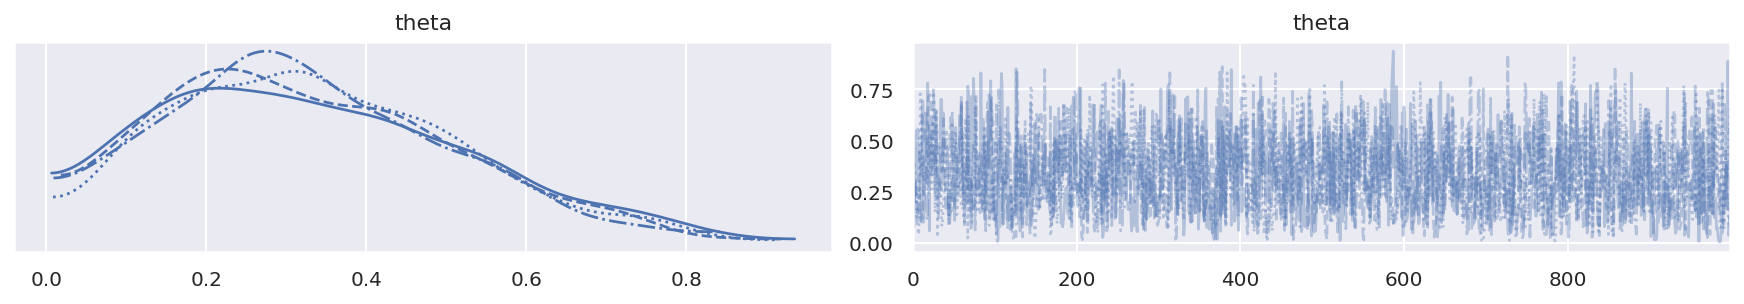

In [7]:
az.plot_trace(trace)
plt.show()

In [8]:
az.plot_posterior(trace, credible_interval=0.95)
plt.show()

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/utils.py:661: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  ("Keyword argument credible_interval has been deprecated " "Please replace with hdi_prob"),
/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


Замените бета-распределение на равномерное распределение в интервале [0, 1]. 

Равнозначны ли полученные результаты результатам для $Beta(\alpha = 1, \beta = 1)$? 

Выполняется ли выборка быстрее, медленнее или за то же время? 

In [9]:
# Context manager creates model container
with pm.Model() as coin_toss_model:
    # Define Beta prior
    theta = pm.Uniform('theta', lower=0, upper=1)
    # Define Bernoulli likelihood
    y = pm.Bernoulli('y', p=theta, observed=data)
    # Make inference sampling 1000 elements from posterior distribution
    trace = pm.sample(1000, random_seed=123)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


In [10]:
az.summary(trace)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
theta  0.335  0.179   0.026    0.659      0.005    0.003    1558.0  1558.0   

       ess_bulk  ess_tail  r_hat  
theta    1505.0    1908.0    1.0

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


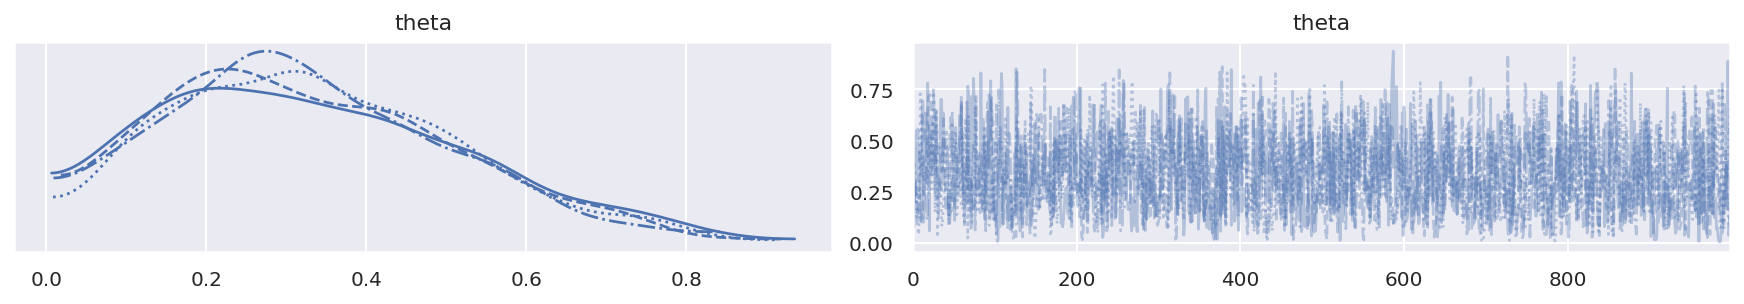

In [11]:
az.plot_trace(trace)
plt.show()

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/utils.py:661: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  ("Keyword argument credible_interval has been deprecated " "Please replace with hdi_prob"),
/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


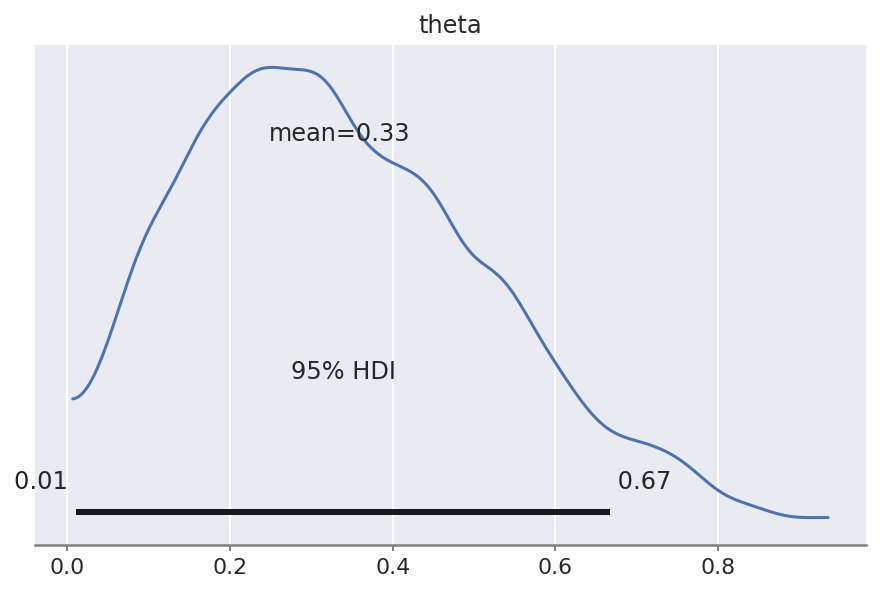

In [12]:
az.plot_posterior(trace, credible_interval=0.95)
plt.show()

Как мы можем видеть, результаты семплинга идентичные и ожидаемые, исходя из свойств $Beta$-распределения, поскольку равномерное распределение на отрезке [0, 1] - это частный случай $Beta(\alpha=1, \beta=1)$.

Семплинг выполняется за одинаковое время в 1 секунду. Гипотетически, это означает, что в механизме статистического вывода частные случаи распределений переводятся в более общие распределения. В данном случае - в $Beta$-распределение.

Как изменяется результат при использовании более широкого интервала, например [–1, 2]? 

Остается ли модель работоспособной? Какие сообщения об ошибках выводятся?

In [13]:
# Context manager creates model container
with pm.Model() as coin_toss_model:
    # Define Beta prior
    theta = pm.Uniform('theta', lower=-1, upper=2)
    # Define Bernoulli likelihood
    y = pm.Bernoulli('y', p=theta, observed=data)
    # Make inference sampling 1000 elements from posterior distribution
    trace = pm.sample(1000, random_seed=123)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
There were 141 divergences after tuning. Increase `target_accept` or reparameterize.
There were 149 divergences after tuning. Increase `target_accept` or reparameterize.
There were 186 divergences after tuning. Increase `target_accept` or reparameterize.
There were 146 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


In [14]:
az.summary(trace)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
theta  0.327  0.181   0.018     0.64      0.005    0.004    1184.0  1184.0   

       ess_bulk  ess_tail  r_hat  
theta     880.0     433.0    1.0

In [15]:
az.plot_trace(trace)
plt.show()

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


In [16]:
az.plot_posterior(trace, credible_interval=0.95)
plt.show()

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/utils.py:661: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  ("Keyword argument credible_interval has been deprecated " "Please replace with hdi_prob"),
/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


Время семплинга остается в 1 секунду, однако качество семплинга ухудшилось, результаты немного отличаются от предыдущих. Причина тому - широко заданыне рамки априорного распределения, не учитывающие контекст задачи (отрицательные значения вероятности). В результате этого появляется предупреждение: 

`There were divergences after tuning. Increase target_accept or reparameterize`

Таким образом, хорошо пространство параметров не было окончательно исследовано. На графиках семплирования во времени, а также оценок плотности выборок для $\theta$ (trace plots) на `divergences` указывают черные полосы.

Кроме того, `ess_mean` указывает на среднее значение эффективного количества семплов, в последнем примере значительно ниже предыдущих -  1184 в сравнении с 1558, что говорит о меньшем числе полезных выборок во вермя семплинга последней модели.

Значение `r_hat` может оценивать сходимость параметров в целом, используя сравнение вариабельности выборок каждого параметра внутри каждой цепи Маркова и между всемя цепями. Несмотря на проблемы в исследовании пространства параметров, `r_hat` говорит о сходимости. Общий график реализации выборок в цепях маркова во времени в целом также не показывает, что какая-либо цепь существенно застряла в некоторой области исследования.

Task 2.

___

Изучите информацию о модели катастроф в угледобывающей промышленности, которая входит в состав документации библиотеки PyMC3: [Link](http://pymc-devs.github.io/pymc3/notebooks/getting_started.html#Case-study-2:-Coal-mining-disasters). Попробуйте самостоятельно реализовать и применить на практике эту модель.
___

Description:

Consider the following time series of recorded coal mining disasters in the UK from 1851 to 1962 (Jarrett, 1979). The number of disasters is thought to have been affected by changes in safety regulations during this period. Unfortunately, we also have pair of years with missing data, identified as missing by a nan in the pandas Series. These missing values will be automatically imputed by PyMC3.

The task is to build a model for this series and estimate when the change occurred.

In [17]:

disaster_data = pd.Series(
    [4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
    3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
    2, 2, 3, 4, 2, 1, 3, np.nan, 2, 1, 1, 1, 1, 3, 0, 0,
    1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
    0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
    3, 3, 1, np.nan, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
    0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1]
)

years = np.arange(1851, 1962)

fig = plt.figure(figsize=(9,5))
plt.plot(years, disaster_data, "o", markersize=8, alpha=0.4)
plt.ylabel("Disaster count")
plt.xlabel("Year")
plt.show()

Occurrences of disasters in the time series is thought to follow a Poisson process with a large rate parameter in the early part of the time series, and from one with a smaller rate in the later part. We are interested in locating the change point in the series, which perhaps is related to changes in mining safety regulations.

$$D_t \sim Pois(r_t), r_t=
\begin{cases}
e, t \le s,\\
l, t > s;
\end{cases},$$

$$s \sim Unif(t_l, t_h),$$
$$e \sim exp(1),$$
$$l \sim exp(1).$$


$D_t$ - the number of disasters in year t;\
$r_t$ - the rate parameter of the Poisson distribution of disasters in year t;\
$s$ - the year in which the rate parameter changes (the switchpoint);\
$e$ - the rate parameter before the switchpoint s;\
$l$ - the rate parameter after the switchpoint s;\
$t_h$ - the lower and upper boundaries of year t;

In [18]:
with pm.Model() as disaster_model:
    
    switchpoint = pm.DiscreteUniform('switchpoint',
                                     lower=years.min(),
                                     upper=years.max(),
                                     testval=1900,
                                    )
    # Priors for pre- and post-switch rates number of disasters
    early_rate = pm.Exponential('early_rate', 1.0)
    late_rate = pm.Exponential('late_rate', 1.0)
    
    # Switch function for rate before and after switchpoint
    # To add the variable to results, pass string definition of it
    rate = pm.math.switch(switchpoint >= years, early_rate, late_rate)
    
    disasters = pm.Poisson('disasters', rate, observed=disaster_data)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/model.py:1731: ImputationWarning: Data in disasters contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


Missing values are handled transparently by passing a MaskedArray or a pandas.DataFrame with NaN values to the observed argument when creating an observed stochastic random variable. Behind the scenes, another random variable, disasters.missing_values is created to model the missing values.

Unfortunately because they are discrete variables and thus have no meaningful gradient, __we cannot use NUTS__ for sampling switchpoint or the missing disaster observations. Instead, __we will sample using a Metroplis step method__, which implements __adaptive Metropolis-Hastings__, because __it is designed to handle discrete values__. PyMC3 automatically assigns the correct sampling algorithms.

In [19]:
with disaster_model:
    trace = pm.sample(10000, return_inferencedata=False)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [disasters_missing]
>>Metropolis: [switchpoint]
>NUTS: [late_rate, early_rate]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 14 seconds.
The number of effective samples is smaller than 10% for some parameters.


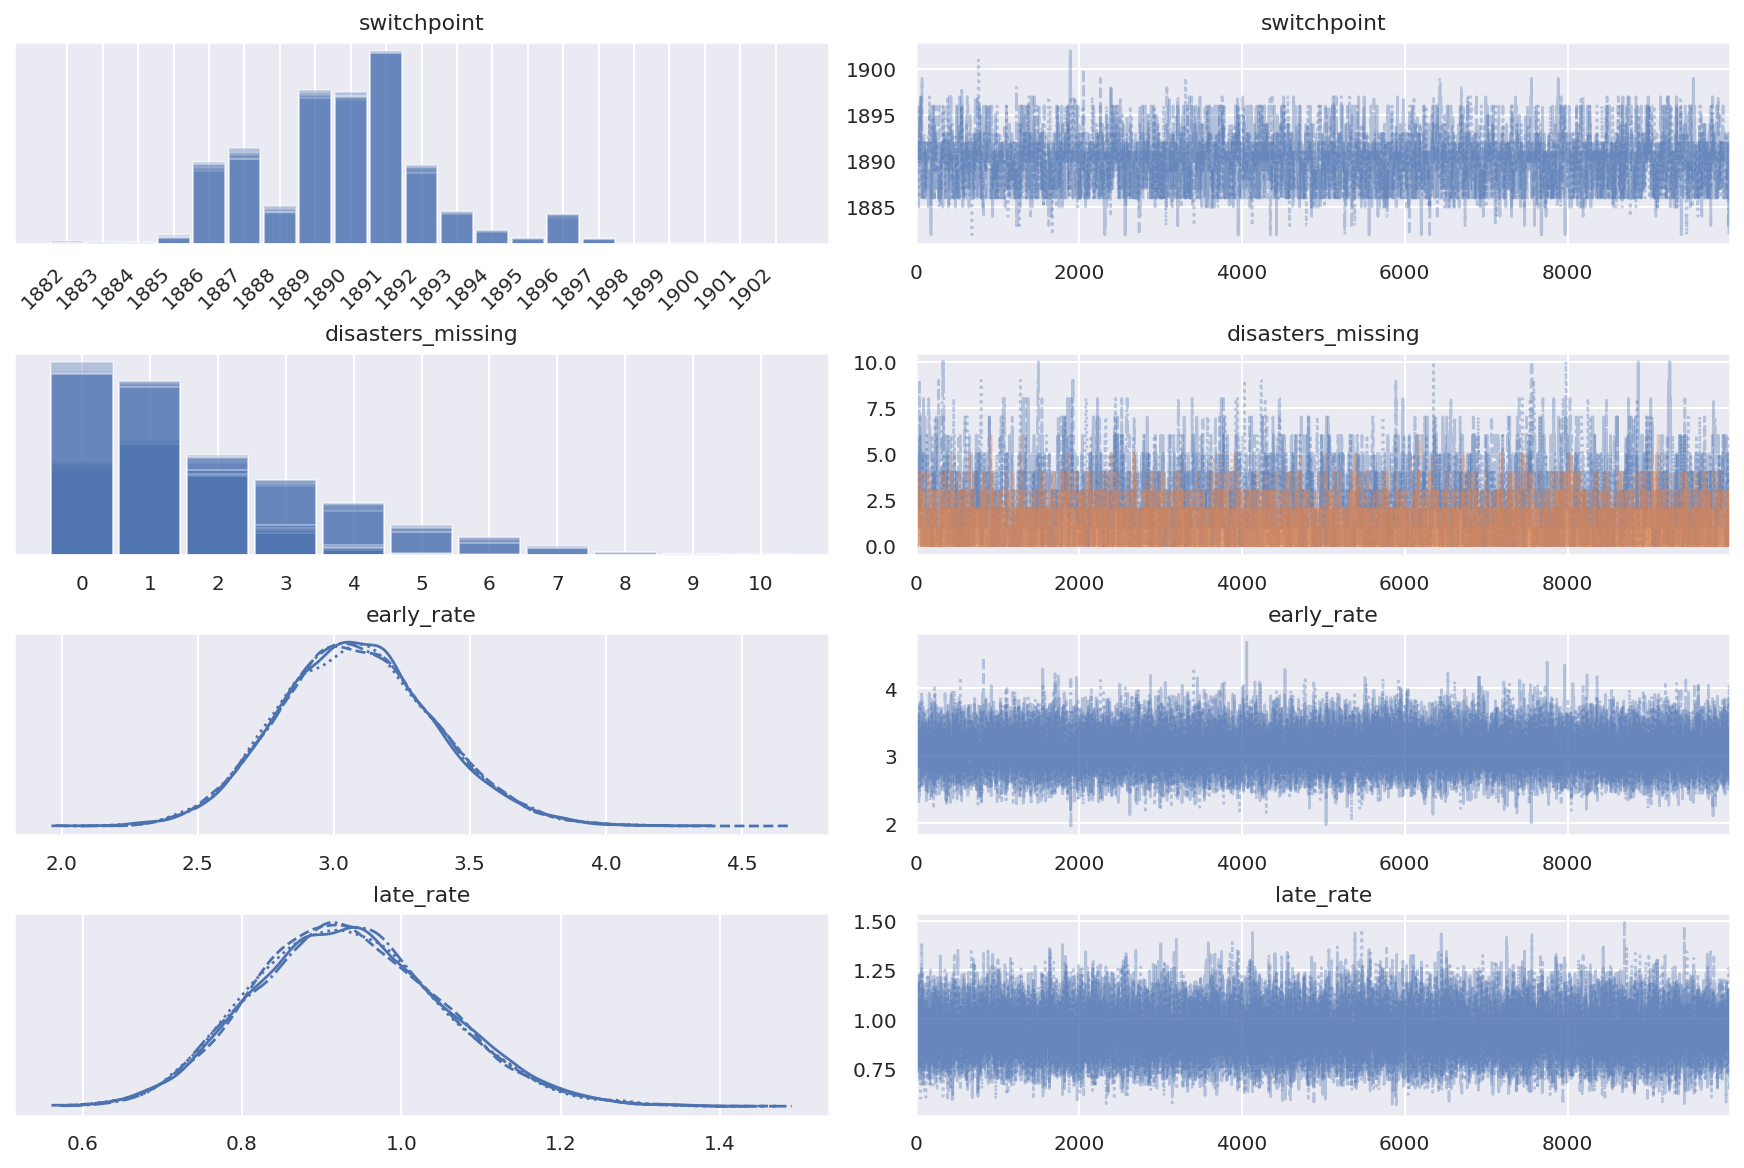

In [20]:
with disaster_model:
    axes_arr = az.plot_trace(trace, figsize=(12, 8))
plt.draw()
for ax in axes_arr.flatten():
    if ax.get_title() == "switchpoint":
        labels = [label.get_text() for label in ax.get_xticklabels()]
        ax.set_xticklabels(labels, rotation=45, ha="right")
        break
plt.draw()

In the trace plot below we can see that there’s about a 10 year span that’s plausible for a significant change in safety, but a 5 year span that contains most of the probability mass. The distribution is jagged because of the jumpy relationship between the year switchpoint and the likelihood and not due to sampling error.

Lets see the switchpoint on a plot with highest density interval (HDI):

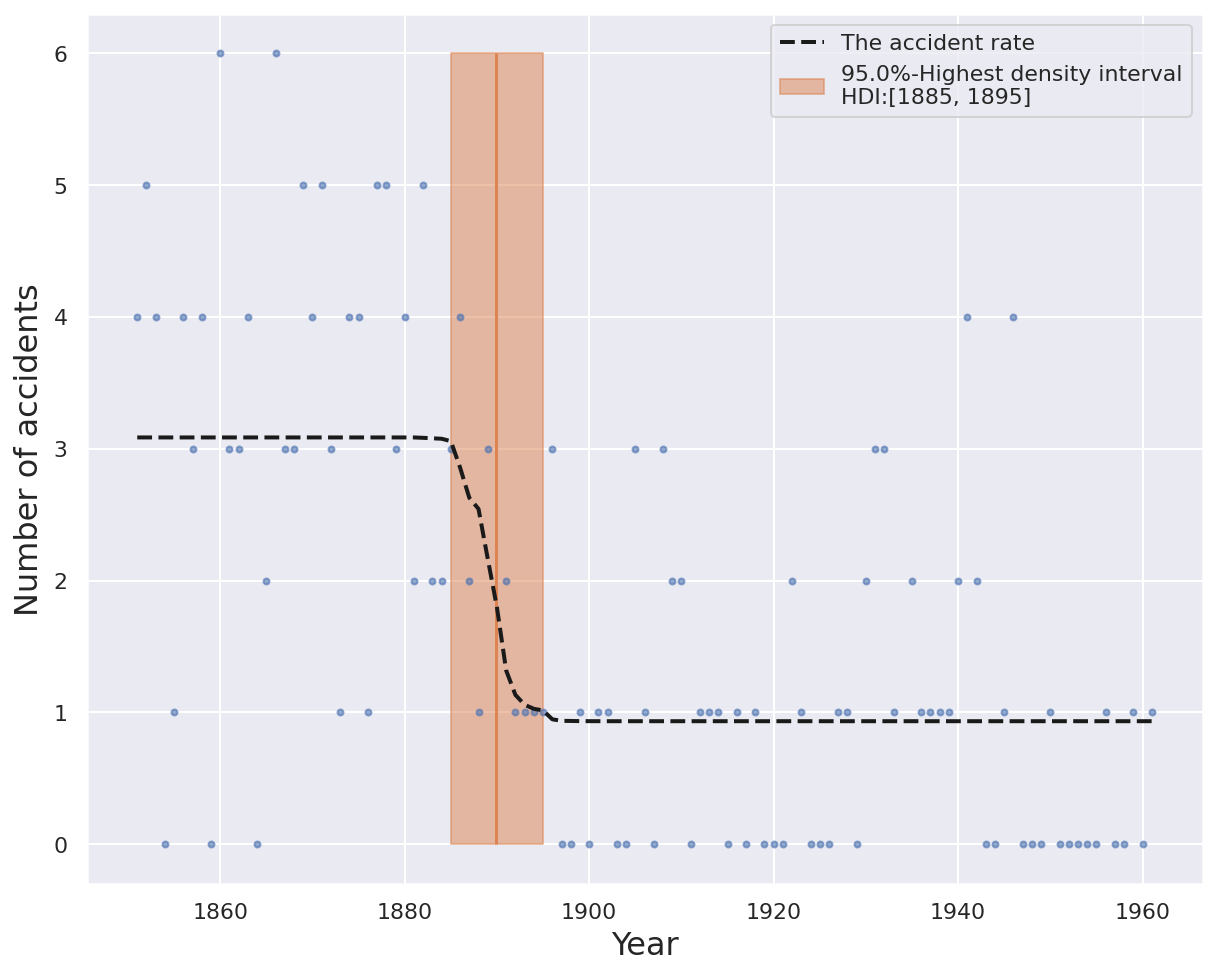

In [21]:
plt.figure(figsize=(10, 8))
plt.plot(years, disaster_data, ".", alpha=0.6)
plt.ylabel("Number of accidents", fontsize=16)
plt.xlabel("Year", fontsize=16)

plt.vlines(trace["switchpoint"].mean(), disaster_data.min(), disaster_data.max(), color="C1")
average_disasters = np.zeros_like(disaster_data, dtype="float")
for i, year in enumerate(years):
    idx = year < trace["switchpoint"]
    average_disasters[i] = np.mean(np.where(idx, trace["early_rate"], trace["late_rate"]))

alpha = 0.95
sp_hpd = az.hdi(trace["switchpoint"],
                hdi_prob=alpha
               )
plt.fill_betweenx(
    y=[disaster_data.min(), disaster_data.max()],
    x1=sp_hpd[0],
    x2=sp_hpd[1],
    alpha=0.5,
    color="C1",
    label=f'{alpha*100}%-Highest density interval\nHDI:[{sp_hpd[0]}, {sp_hpd[1]}]'
)
plt.plot(years, average_disasters, "k--", lw=2, label='The accident rate')
plt.legend()
plt.show()

Task 3.

___
* Отредактируйте модель `model_g`, изменив априорное распределение для среднего значения гауссова распределения, центрированного в эмпирически определенной точке среднего значения, и поэкспериментируйте с несколькими разумными значениями для стандартного отклонения этого априорного распределения. 

* Насколько надежными/осмысленными являются статистические выводы при этих изменениях? 

* Что вы думаете об использовании гауссова распределения (которое является неограниченным распределением от $\infty$ до $-\infty$) для моделирования ограниченных данных, как в рассматриваемом случае? Напомним, что ранее было сказано о невозможности получить значения меньше 0 и больше 100.
___

Baseline-модель

In [22]:
data = np.loadtxt('../data/chemical_shifts.csv')

In [23]:
def model_g(data, mu_lower=40, mu_upper=70, sigma_sd=10, draws=1000):
    with pm.Model() as model_g:
        mu = pm.Uniform('mu', lower=mu_lower, upper=mu_upper)
        sigma = pm.HalfNormal('sigma', sd=sigma_sd)
        y = pm.Normal('y', mu=mu, sd=sigma, observed=data)
        trace_g = pm.sample(draws=draws)
    return trace_g

In [24]:
trace_g = model_g(data)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


In [25]:
az.summary(trace_g)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
mu     53.509  0.523  52.535   54.464      0.009    0.006    3363.0  3363.0   
sigma   3.554  0.384   2.885    4.305      0.007    0.005    3185.0  3142.0   

       ess_bulk  ess_tail  r_hat  
mu       3357.0    2544.0    1.0  
sigma    3170.0    2533.0    1.0

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


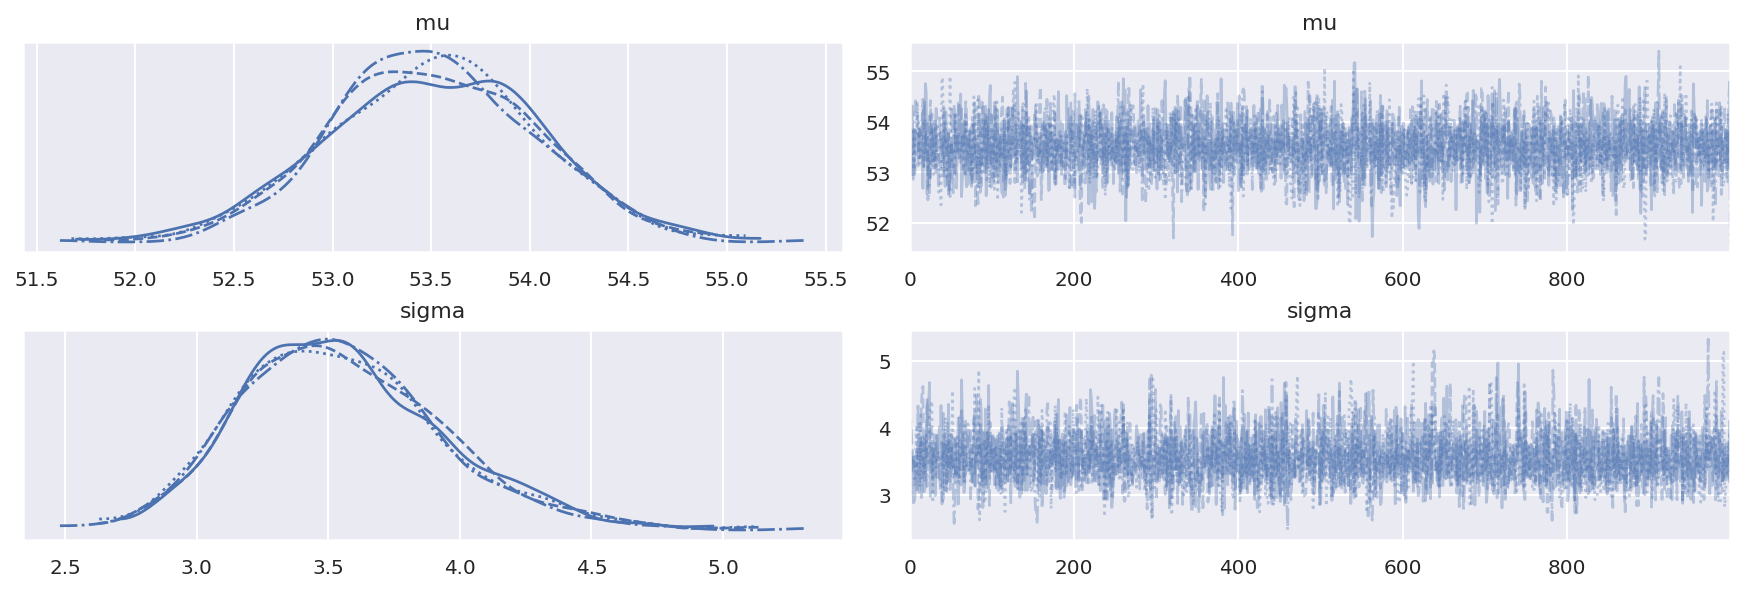

In [26]:
az.plot_trace(trace_g)
plt.show()

In [27]:
trace_g2 = model_g(data, mu_lower=0, mu_upper=100)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


In [28]:
az.summary(trace_g2)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
mu     53.505  0.513  52.590   54.513      0.009    0.006    3190.0  3189.0   
sigma   3.541  0.380   2.847    4.242      0.008    0.006    2527.0  2374.0   

       ess_bulk  ess_tail  r_hat  
mu       3203.0    2491.0    1.0  
sigma    2762.0    2284.0    1.0

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


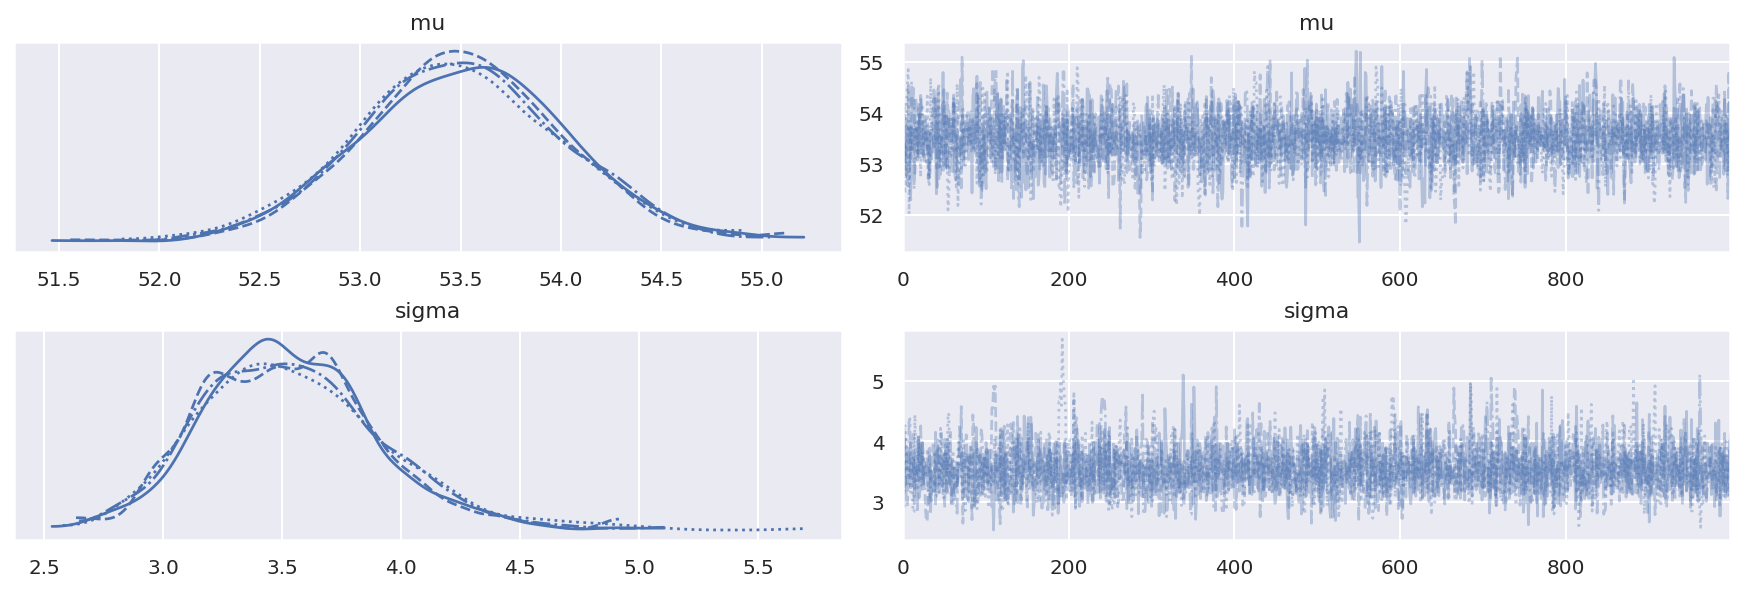

In [29]:
az.plot_trace(trace_g2)
plt.show()

In [30]:
trace_g3 = model_g(data, mu_lower=0, mu_upper=100, sigma_sd=2)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


In [31]:
az.summary(trace_g3)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
mu     53.489  0.504  52.583   54.509      0.009    0.006    3306.0  3306.0   
sigma   3.432  0.350   2.815    4.071      0.006    0.004    3096.0  3036.0   

       ess_bulk  ess_tail  r_hat  
mu       3297.0    2610.0    1.0  
sigma    3170.0    2927.0    1.0

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


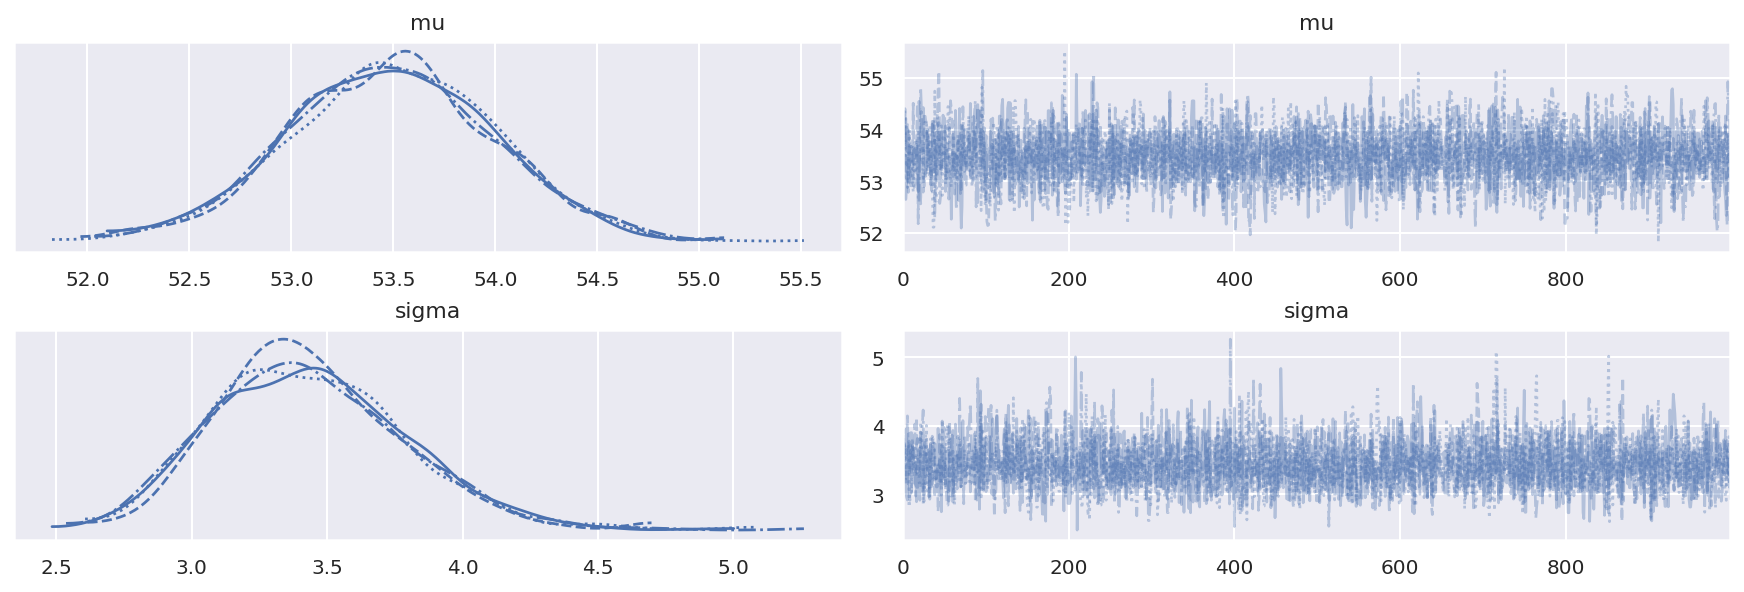

In [32]:
az.plot_trace(trace_g3)
plt.show()

In [33]:
trace_g4 = model_g(data, mu_lower=0, mu_upper=100, sigma_sd=50)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


In [34]:
az.summary(trace_g4)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
mu     53.515  0.53   52.50   54.483      0.010    0.007    3008.0  2998.0   
sigma   3.560  0.39    2.87    4.311      0.007    0.005    2996.0  2906.0   

       ess_bulk  ess_tail  r_hat  
mu       3006.0    2448.0    1.0  
sigma    3111.0    2243.0    1.0

In [35]:
az.plot_trace(trace_g4)
plt.show()

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


При варьировании априорного распределения для среднего значения изменений не произошло, при расширении априорного распределения для стандартного отклонения требуется большее число семплов.

    Logically however, there could be some question about the choice of an unbounded prior.
    Since it is not possible to get values below 0 or above 100, it doesn't make practical sense to have a prior that exists for those values. Luckily though, with modern inference methods such as NUTS, the samples can "bypass" questionable priors and still get a good approximation of the posterior.

Task 4.

Используя данные из файла `chemical_shift.csv`, вычислите эмпирическое среднее значение и стандартное отклонение с учетом и без учета выбросов. Сравните полученные результаты с байесовской оценкой, использующей гауссово распределение и t-распределение Стьюдента. Повторите вычисления с добавлением большего количества выбросов.

In [36]:
data = np.loadtxt('../data/chemical_shifts.csv')

In [37]:
data

array([51.06, 55.12, 53.73, 50.24, 52.05, 56.4 , 48.45, 52.34, 55.65,
       51.49, 51.86, 63.43, 53.  , 56.09, 51.93, 52.31, 52.33, 57.48,
       57.44, 55.14, 53.93, 54.62, 56.09, 68.58, 51.36, 55.47, 50.73,
       51.94, 54.95, 50.39, 52.91, 51.5 , 52.68, 47.72, 49.73, 51.82,
       54.99, 52.84, 53.19, 54.52, 51.46, 53.73, 51.61, 49.81, 52.42,
       54.3 , 53.84, 53.16])

In [38]:
emp_mean, emp_std = np.mean(data), np.std(data)
print(emp_mean, emp_std)

53.49645833333333 3.4200063898474258


Избавимся от выбросов, отфильтровав данные, заходящие за 2 стандартных отклонения

In [39]:
data_unbiased = data[data<emp_mean+2*emp_std]
data_unbiased

array([51.06, 55.12, 53.73, 50.24, 52.05, 56.4 , 48.45, 52.34, 55.65,
       51.49, 51.86, 53.  , 56.09, 51.93, 52.31, 52.33, 57.48, 57.44,
       55.14, 53.93, 54.62, 56.09, 51.36, 55.47, 50.73, 51.94, 54.95,
       50.39, 52.91, 51.5 , 52.68, 47.72, 49.73, 51.82, 54.99, 52.84,
       53.19, 54.52, 51.46, 53.73, 51.61, 49.81, 52.42, 54.3 , 53.84,
       53.16])

In [40]:
emp_mean2, emp_std2 = np.mean(data_unbiased), np.std(data_unbiased)
print(emp_mean2, emp_std2)

52.95260869565218 2.1950303897892387


Для удобства снова зададим модели в этом же задании, обернув их в удобные функции для вызова

In [41]:
# Модель с правдоподобием на основе номрального распределения
def model_g(data, mu_lower=40, mu_upper=70, sigma_sd=10, draws=1000):
    with pm.Model() as model_g:
        mu = pm.Uniform('mu', lower=mu_lower, upper=mu_upper)
        sigma = pm.HalfNormal('sigma', sd=sigma_sd)
        y = pm.Normal('y', mu=mu, sd=sigma, observed=data)
        trace_g = pm.sample(draws=draws)
    return trace_g

# Модель с правдоподобием на основе t-распределения
def model_t(data, mu_lower=40, mu_upper=70, sigma_sd=10, nu_inv_mean=1/30, draws=1000):
    with pm.Model() as model_t:
        mu = pm.Uniform('mu', mu_lower, mu_upper)
        sigma = pm.HalfNormal('sigma', sd=sigma_sd)
        nu = pm.Exponential('nu', nu_inv_mean)
        y = pm.StudentT('y', mu=mu, sd=sigma, nu=nu, observed=data)
        trace_t = pm.sample(1000)
    return trace_t

In [42]:
trace_g = model_g(data=data)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


In [43]:
az.summary(trace_g)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
mu     53.487  0.515  52.462   54.397      0.009    0.006    3457.0  3457.0   
sigma   3.547  0.384   2.804    4.225      0.007    0.005    3442.0  3400.0   

       ess_bulk  ess_tail  r_hat  
mu       3477.0    2476.0    1.0  
sigma    3486.0    2883.0    1.0

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

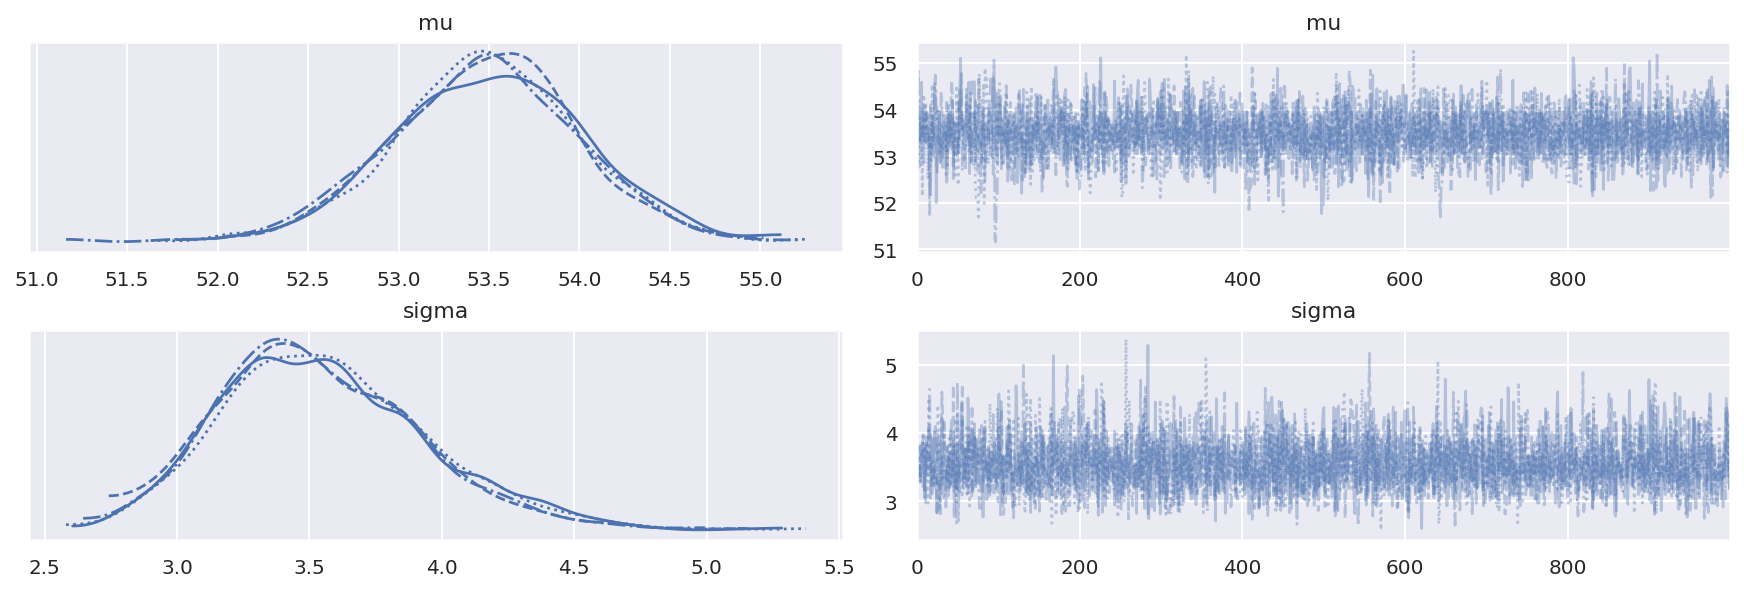

In [44]:
az.plot_trace(trace_g)

In [45]:
trace_t = model_t(data=data)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, sigma, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
The acceptance probability does not match the target. It is 0.8809731921350353, but should be close to 0.8. Try to increase the number of tuning steps.


In [46]:
az.summary(trace_t)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
mu     53.000  0.386  52.280   53.717      0.008    0.005    2515.0  2513.0   
sigma   2.196  0.406   1.496    2.961      0.010    0.007    1610.0  1548.0   
nu      4.590  3.844   1.209    9.653      0.120    0.085    1031.0  1031.0   

       ess_bulk  ess_tail  r_hat  
mu       2526.0    2404.0    1.0  
sigma    1687.0    1724.0    1.0  
nu       1791.0    1844.0    1.0

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>],
       [<AxesSubplot:title={'center':'nu'}>,
        <AxesSubplot:title={'center':'nu'}>]], dtype=object)

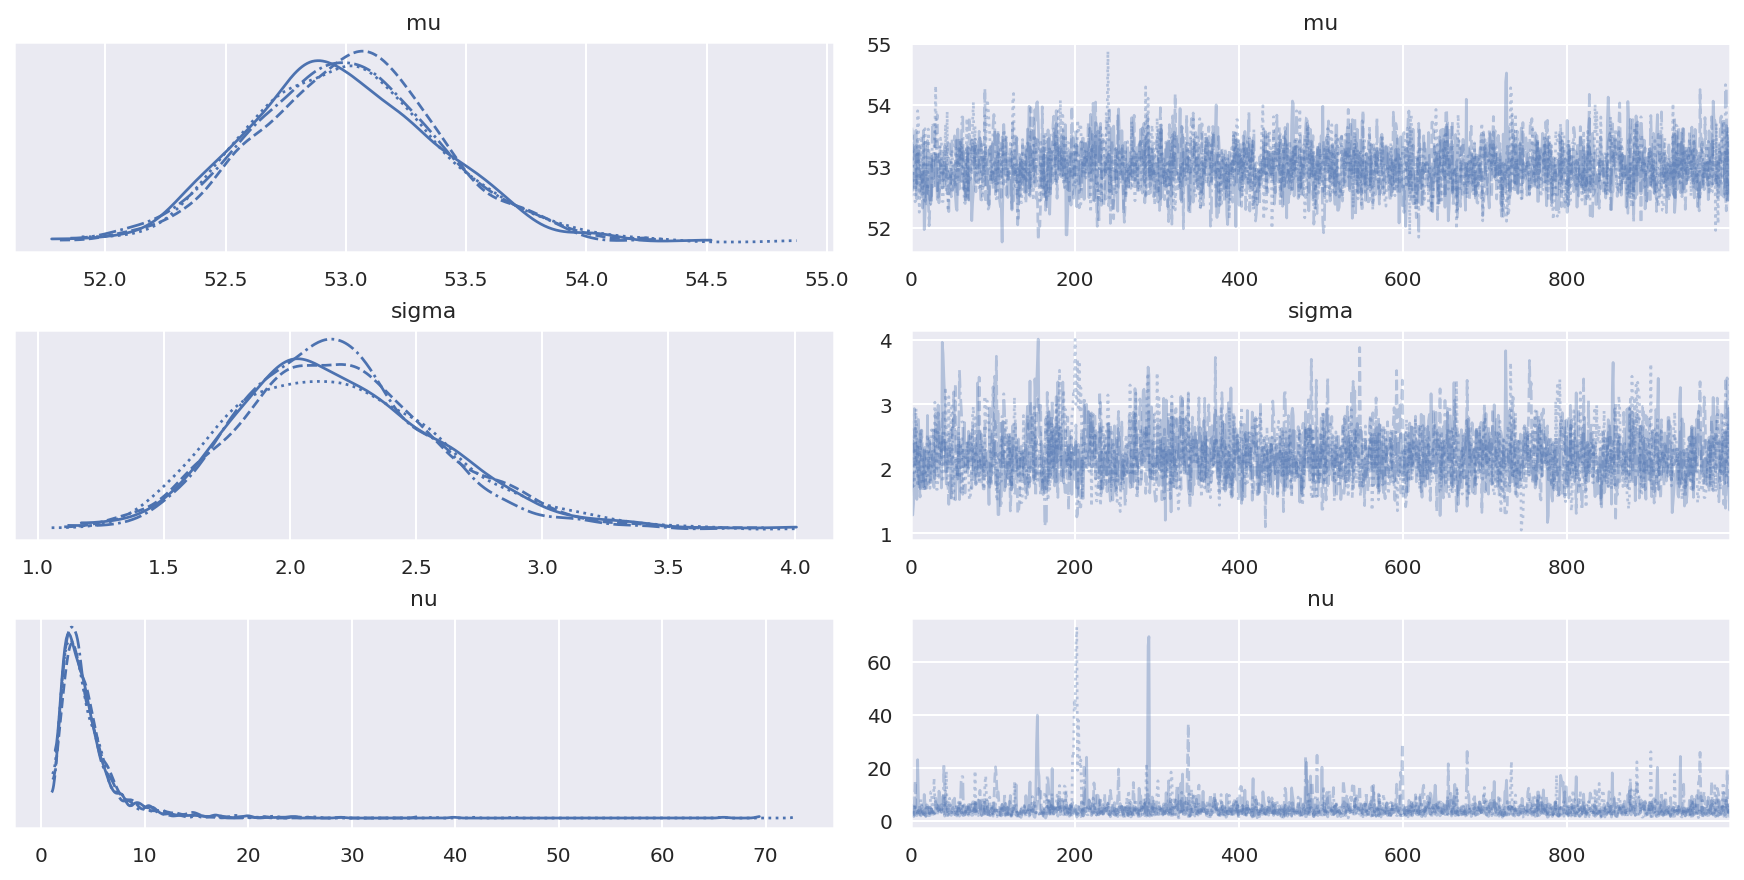

In [47]:
az.plot_trace(trace_t)

Добавим искусственный bias на базе среднего, двух стандартных отколонений и случайного возмущения.

In [48]:
biases = []

for i in range(10):
    biases.append(np.mean(data) + 2*np.std(data) +np.random.normal())

In [49]:
data_with_biases = data.tolist()
data_with_biases.extend(biases)

In [50]:
trace_g = model_g(data=data_with_biases)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


In [51]:
az.summary(trace_g)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
mu     54.646  0.548  53.643   55.657      0.009    0.007    3346.0  3344.0   
sigma   4.160  0.396   3.505    4.974      0.007    0.005    3182.0  3166.0   

       ess_bulk  ess_tail  r_hat  
mu       3346.0    2608.0    1.0  
sigma    3118.0    2819.0    1.0

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

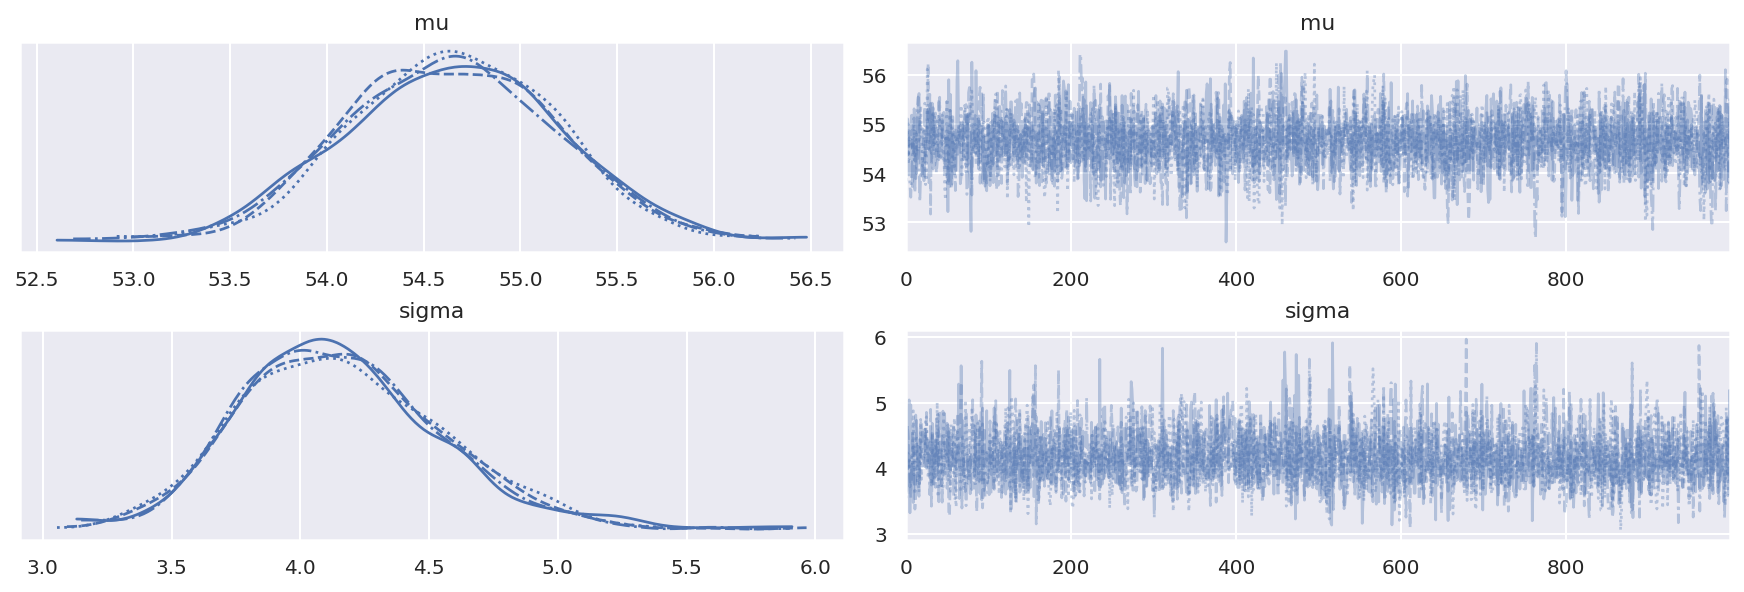

In [52]:
az.plot_trace(trace_g)

In [53]:
trace_t = model_t(data=data_with_biases)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, sigma, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.


In [54]:
az.summary(trace_t)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
mu     54.400   0.585  53.358   55.526      0.015    0.010    1598.0  1598.0   
sigma   3.801   0.488   2.855    4.702      0.014    0.010    1194.0  1194.0   
nu     27.851  27.453   1.886   80.195      0.708    0.501    1502.0  1502.0   

       ess_bulk  ess_tail  r_hat  
mu       1606.0    1537.0    1.0  
sigma    1232.0     789.0    1.0  
nu       1003.0    1253.0    1.0

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>],
       [<AxesSubplot:title={'center':'nu'}>,
        <AxesSubplot:title={'center':'nu'}>]], dtype=object)

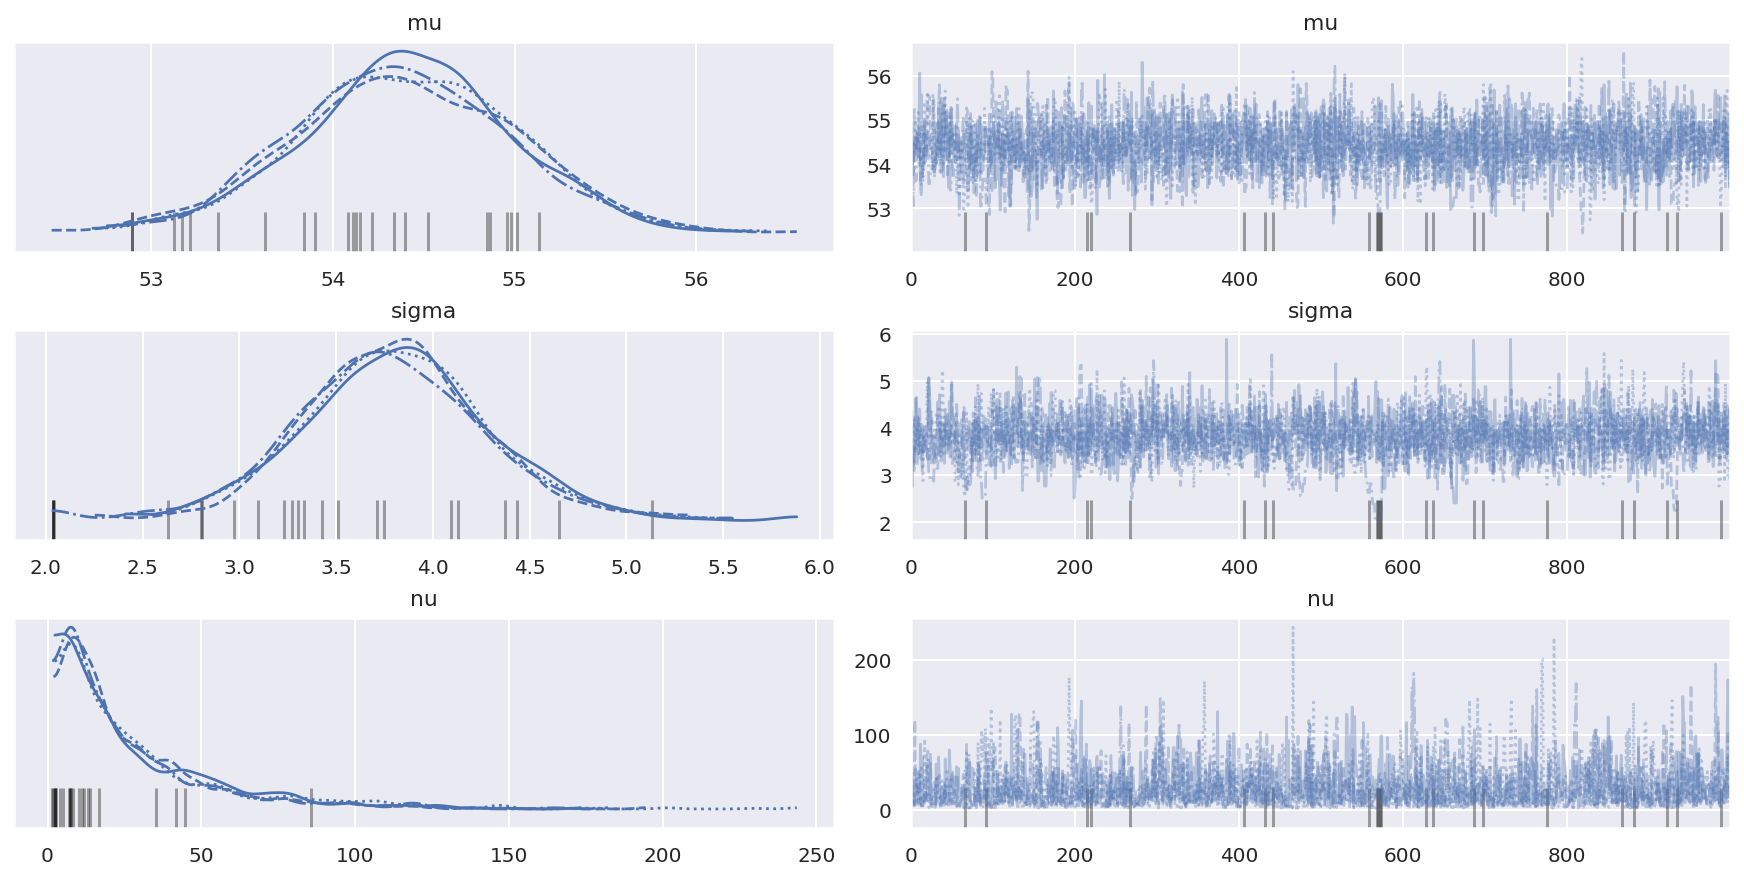

In [55]:
az.plot_trace(trace_t)

In [56]:
emp_mean, emp_std = np.mean(data_with_biases), np.std(data_with_biases)
print(emp_mean, emp_std)

54.65911590320317 4.044090633084875


Как мы можем видеть, большее число выбросов соответствует большей дисперсии, росут неопределенности. Эмпирическое  среднее, среднее по апостериорному распределению смещаются в большую стороны вследствие роста выбросов.

Task 5.

Измените пример с оценкой получения чаевых, сделав его устойчивым к выбросам. Попробуйте ввести один совместно используемый параметр $\nu$ для всех групп и по одному отдельному параметру $\nu$ для каждой группы. Выполните проверки прогнозируемого апостериорного распределения для оценки этих трех моделей.

Для того, чтоы сделать пример с чаевыми устойчивым к выбросам, заменим нормальное распределение в правдоподобии модели на t-распределение.

In [57]:
df_data = pd.read_csv('../data/tips.csv')
df_data.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [58]:
tip = df_data['tip'].values
idx = pd.Categorical(df_data['day'], categories=['Thur', 'Fri', 'Sat', 'Sun']).codes
groups = len(np.unique(idx))

В первой модели параметр $\nu$ в правдоподобии отсавим константным:

In [59]:
with pm.Model() as comparing_groups1:
    
    mu = pm.Normal('mu', mu=0, sd=10, shape=groups)
    sigma=pm.HalfNormal('sigma', sd=10, shape=groups)
    y = pm.StudentT('y', mu=mu[idx], sd=sigma[idx], nu=5, observed=tip)
    
    trace_5_1 = pm.sample(5000)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 7 seconds.


Теперь, во второй модели введем $\nu$ как параметр со своим априорным распределением ля всех групп сразу:

In [60]:
with pm.Model() as comparing_groups2:
    
    nu = pm.Exponential('nu', 1/5)
    mu = pm.Normal('mu', mu=0, sd=10, shape=groups)
    sigma=pm.HalfNormal('sigma', sd=10, shape=groups)
    y = pm.StudentT('y', mu=mu[idx], sd=sigma[idx], nu=nu, observed=tip)
    
    trace_5_2 = pm.sample(5000)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu, nu]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 11 seconds.


В третьей модели сделаем $\nu$ вектором, в котором каждый скаляр будет соответствовать каждой из групп - дней недели:

In [61]:
with pm.Model() as comparing_groups3:
    
    nu = pm.Exponential('nu', 1/5, shape=groups)
    mu = pm.Normal('mu', mu=0, sd=10, shape=groups)
    sigma=pm.HalfNormal('sigma', sd=10, shape=groups)
    y = pm.StudentT('y', mu=mu[idx], sd=sigma[idx], nu=nu[idx], observed=tip)
    
    trace_5_3 = pm.sample(5000)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu, nu]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 13 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


In [62]:
az.summary(trace_5_1)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  \
mu[0]     2.563  0.151   2.277    2.843      0.001    0.001   23608.0   
mu[1]     2.714  0.262   2.219    3.209      0.002    0.001   26468.0   
mu[2]     2.713  0.134   2.468    2.974      0.001    0.001   25970.0   
mu[3]     3.177  0.148   2.903    3.457      0.001    0.001   27299.0   
sigma[0]  1.025  0.121   0.806    1.257      0.001    0.001   23307.0   
sigma[1]  0.985  0.208   0.621    1.371      0.001    0.001   21028.0   
sigma[2]  1.101  0.112   0.897    1.315      0.001    0.000   26852.0   
sigma[3]  1.097  0.111   0.891    1.307      0.001    0.000   26448.0   

           ess_sd  ess_bulk  ess_tail  r_hat  
mu[0]     23367.0   23709.0   15279.0    1.0  
mu[1]     26268.0   26708.0   14585.0    1.0  
mu[2]     25601.0   26073.0   15979.0    1.0  
mu[3]     27238.0   27311.0   17316.0    1.0  
sigma[0]  22766.0   23572.0   16216.0    1.0  
sigma[1]  19169.0   22806.0   14867.0    1.0  
sigma[2]  25976.0   27418.0   15551.0    1.0  
sigma[3]  25436.0   27166.0   15281.0    1.0

In [63]:
az.summary(trace_5_2)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  \
mu[0]     2.556  0.160   2.250    2.848      0.001    0.001   22092.0   
mu[1]     2.716  0.260   2.217    3.199      0.002    0.001   22139.0   
mu[2]     2.709  0.138   2.453    2.968      0.001    0.001   22111.0   
mu[3]     3.172  0.149   2.896    3.459      0.001    0.001   25523.0   
nu        5.095  1.809   2.440    8.269      0.015    0.011   14989.0   
sigma[0]  1.013  0.134   0.766    1.264      0.001    0.001   20209.0   
sigma[1]  0.981  0.212   0.619    1.384      0.001    0.001   21392.0   
sigma[2]  1.093  0.138   0.845    1.356      0.001    0.001   18480.0   
sigma[3]  1.089  0.117   0.871    1.311      0.001    0.001   21045.0   

           ess_sd  ess_bulk  ess_tail  r_hat  
mu[0]     21925.0   22159.0   16307.0    1.0  
mu[1]     22139.0   22353.0   14282.0    1.0  
mu[2]     21926.0   22216.0   15351.0    1.0  
mu[3]     25452.0   25579.0   15519.0    1.0  
nu        13950.0   16477.0   13975.0    1.0  
sigma[0]  19996.0   20218.0   15203.0    1.0  
sigma[1]  19187.0   23452.0   15406.0    1.0  
sigma[2]  18096.0   18694.0   16479.0    1.0  
sigma[3]  20878.0   21019.0   15084.0    1.0

In [64]:
az.summary(trace_5_3)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  \
mu[0]      2.575  0.177   2.244    2.906      0.001    0.001   19544.0   
mu[1]      2.719  0.261   2.215    3.208      0.002    0.001   25847.0   
mu[2]      2.657  0.129   2.424    2.906      0.001    0.001   26014.0   
mu[3]      3.204  0.147   2.940    3.490      0.001    0.001   28933.0   
nu[0]      7.068  4.753   1.256   15.619      0.034    0.025   19854.0   
nu[1]      8.547  5.647   1.178   19.044      0.038    0.029   22356.0   
nu[2]      2.971  1.056   1.454    4.895      0.008    0.006   17495.0   
nu[3]     11.545  6.045   2.762   22.395      0.040    0.031   22829.0   
sigma[0]   1.033  0.159   0.731    1.331      0.001    0.001   16484.0   
sigma[1]   1.002  0.215   0.616    1.411      0.001    0.001   22345.0   
sigma[2]   0.959  0.129   0.711    1.192      0.001    0.001   21492.0   
sigma[3]   1.162  0.117   0.942    1.381      0.001    0.001   25101.0   

           ess_sd  ess_bulk  ess_tail  r_hat  
mu[0]     19544.0   19496.0   14962.0    1.0  
mu[1]     25674.0   26021.0   15463.0    1.0  
mu[2]     25870.0   26066.0   14989.0    1.0  
mu[3]     28865.0   28979.0   14362.0    1.0  
nu[0]     18510.0   17228.0   11422.0    1.0  
nu[1]     18906.0   23096.0   15289.0    1.0  
nu[2]     14079.0   22137.0   13889.0    1.0  
nu[3]     19578.0   23739.0   16696.0    1.0  
sigma[0]  16484.0   16472.0   10090.0    1.0  
sigma[1]  20787.0   22825.0   13475.0    1.0  
sigma[2]  20618.0   22082.0   15348.0    1.0  
sigma[3]  25080.0   24943.0   15690.0    1.0

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

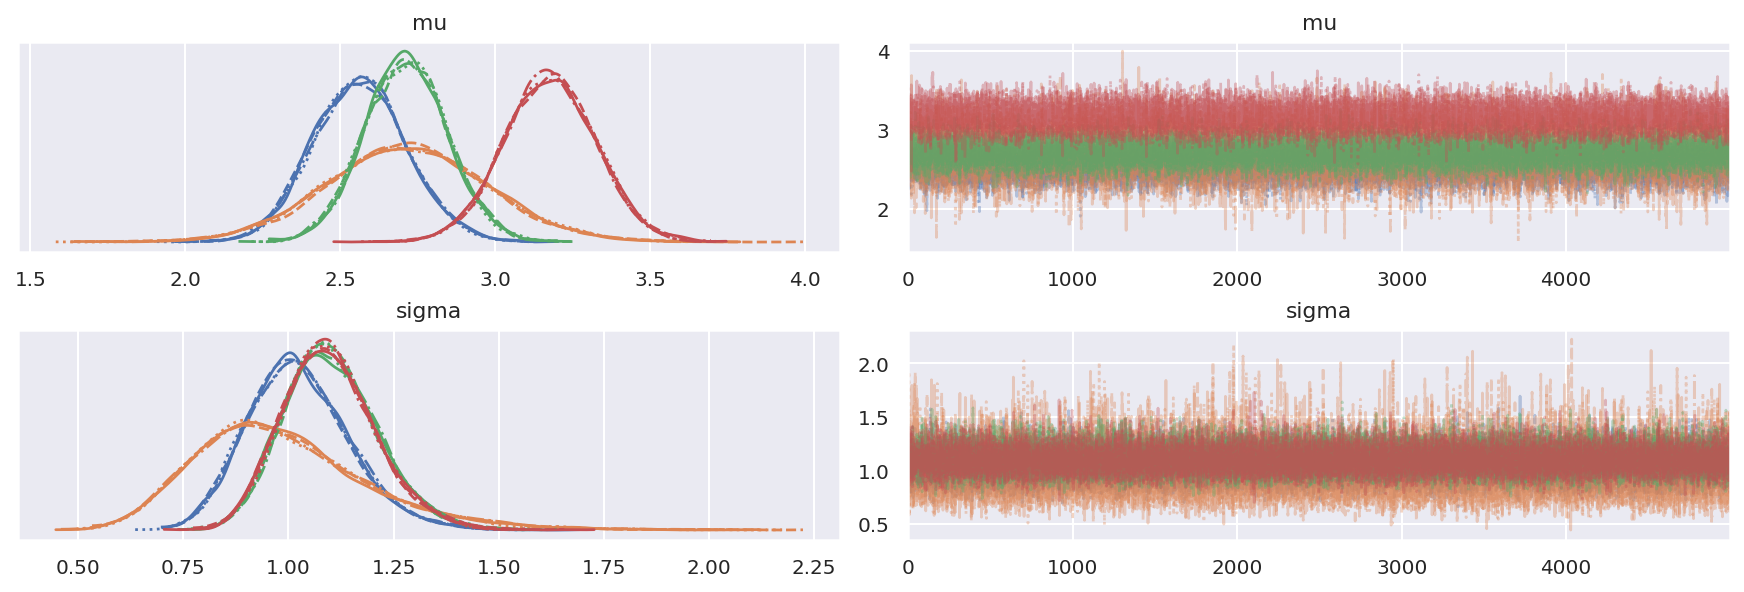

In [65]:
az.plot_trace(trace_5_1)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'nu'}>,
        <AxesSubplot:title={'center':'nu'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

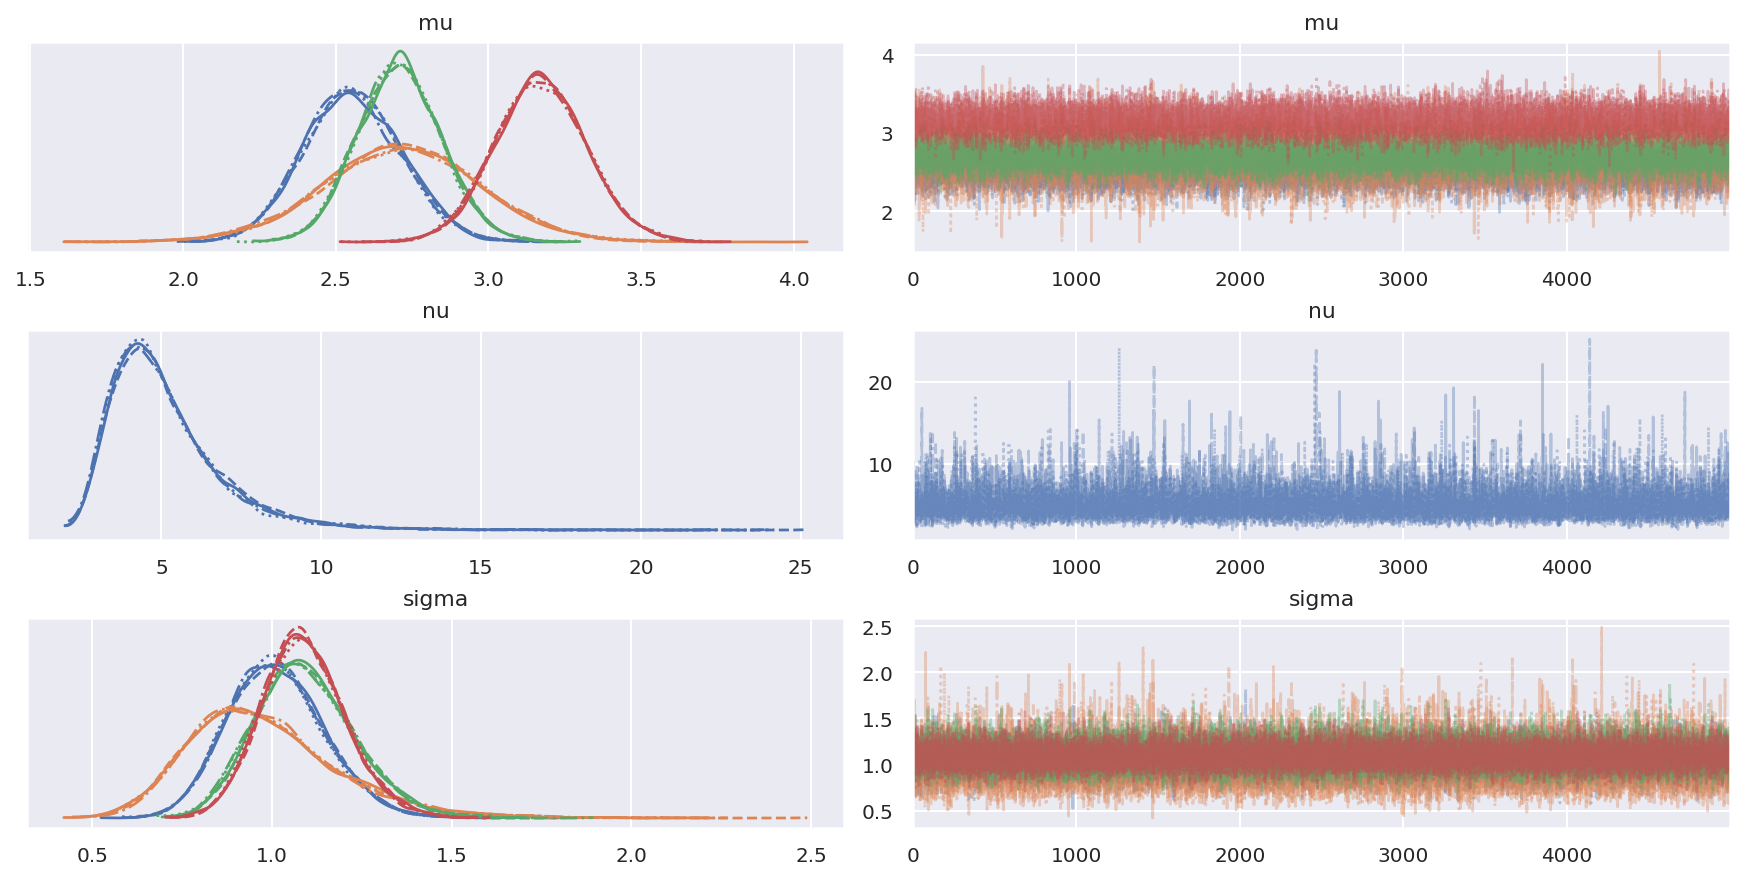

In [66]:
az.plot_trace(trace_5_2)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'nu'}>,
        <AxesSubplot:title={'center':'nu'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

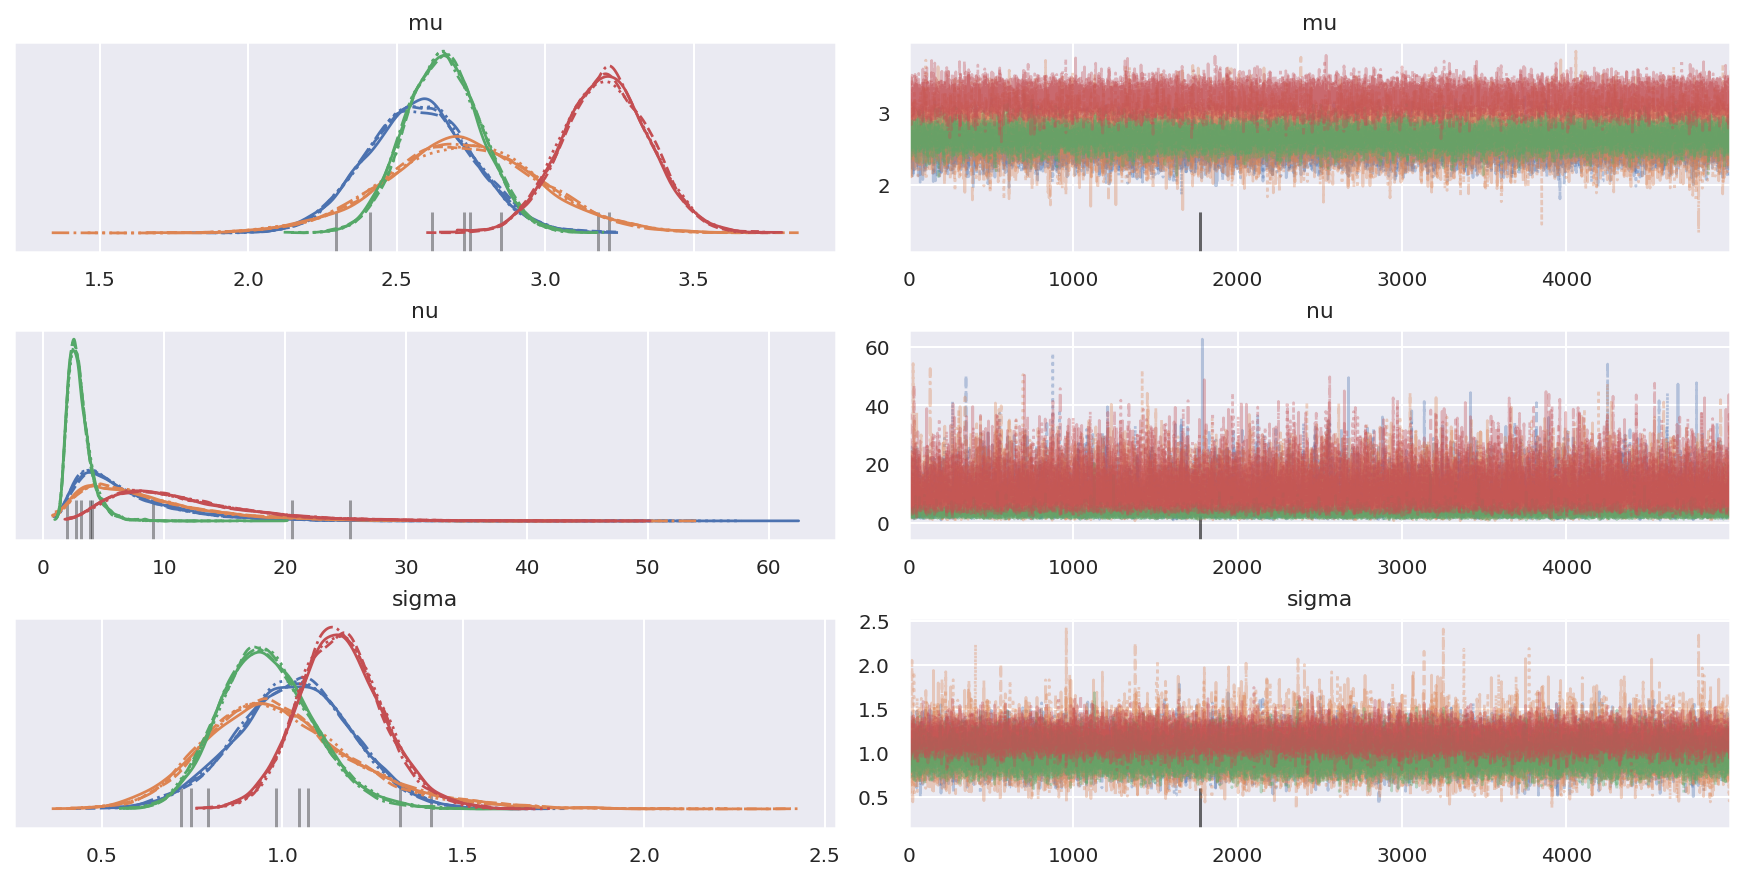

In [67]:
az.plot_trace(trace_5_3)

Можно видеть, что цепи Маркова сходятся, отсутствуют дивергенции. В третьем модели средние значения и стандартные отклонения $\nu$ для каждой группы получились существенно разными. 

In [68]:
def plot_posterior_predictive(model, trace, title, samples=100, random_seed=123):
    y_ppc_t = pm.sample_posterior_predictive(
    trace, samples, model, random_seed=random_seed)
    y_pred_t = az.from_pymc3(trace=trace, posterior_predictive=y_ppc_t)
    ax = az.plot_ppc(y_pred_t, figsize=(6, 4), mean=False)
    posterior_mean = np.mean(y_ppc_t['y'])
    title = title + f'\nPosterior mean {posterior_mean:9.4f}'
    plt.title(title)
    plt.legend(fontsize=15)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:1691: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
posterior predictive variable y's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


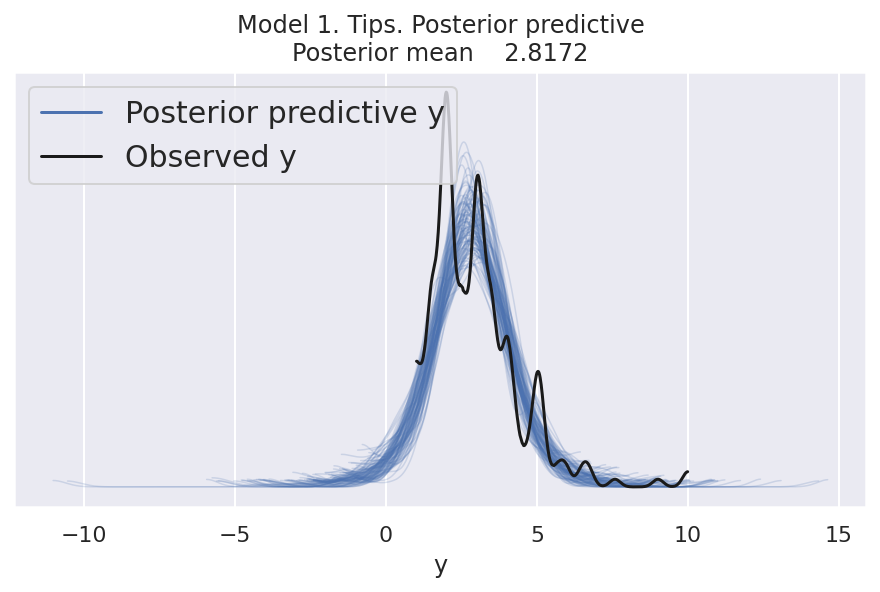

In [69]:
plot_posterior_predictive(comparing_groups1, trace_5_1, 'Model 1. Tips. Posterior predictive')

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:1691: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
posterior predictive variable y's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


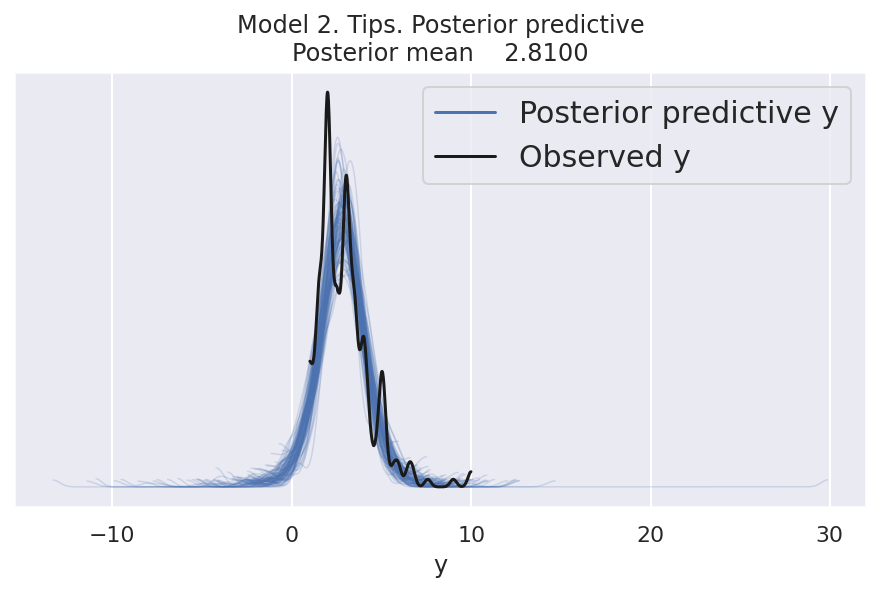

In [70]:
plot_posterior_predictive(comparing_groups2, trace_5_2, 'Model 2. Tips. Posterior predictive')

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:1691: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
posterior predictive variable y's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


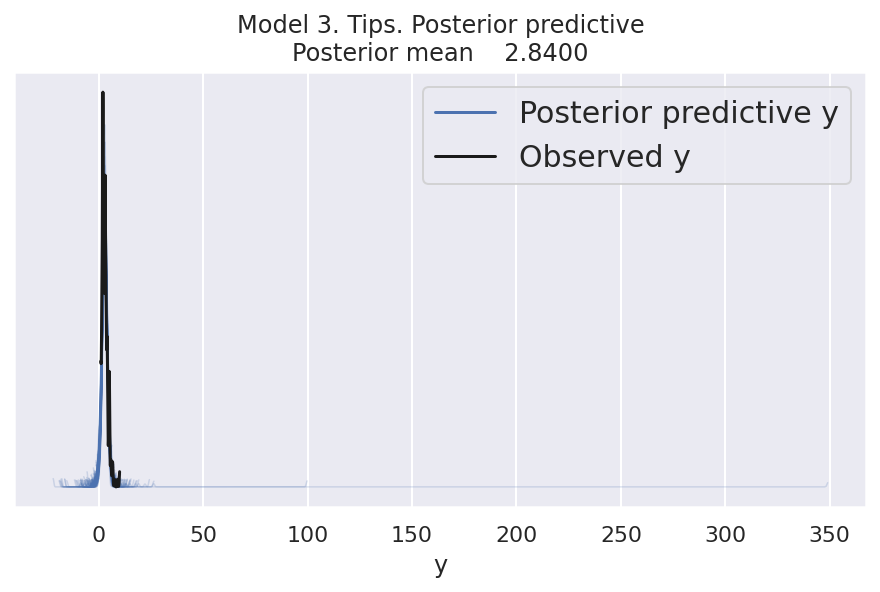

In [71]:
plot_posterior_predictive(comparing_groups3, trace_5_3, 'Model 3. Tips. Posterior predictive')

Task 6. 

Вычислите вероятность превосходства непосредственно из апостериорного распределения (без предварительного вычисления d-меры Коэна). Можно воспользоваться функцией `pm.sample_posterior_predictive()` для получения выборки из каждой группы. Действительно ли полученный результат отличается от результата вычислений с предположением о нормальности? Можете ли вы объяснить полученный результат?

In [72]:
with pm.Model() as comparing_groups:
    
    mu = pm.Normal('mu', mu=0, sd=10, shape=groups)
    sigma=pm.HalfNormal('sigma', sd=10, shape=groups)
    y = pm.Normal('y', mu=mu[idx], sd=sigma[idx], observed=tip)
    
    trace_cg = pm.sample(5000)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 7 seconds.


Для того, чтобы вычислить вреоятность превосходства без d-меры Коэна, необходимо напрямую оттолкнуться от определения:

Вероятность превосходства (probability of superiority) - вероятность того, что точка данных, выбранная случайным образом из одной группы, имеет большее значение, чем точка данных, также случайным образом выбранная из другой группы.

Для этого:
1. Сформируем выборки заданного размера m из апостериорного прогнозируемого рапсределения (posterior predictive).
2. Сделаем сопоставления по определению за n<m итераций.

Изначальных данных - 244 наблюдения, поэтому 244 значения posterior predictive будут получены m раз. Чтобы получить все значения какой-то группы, наложим маску с уже существующими метками дня недели по каждому наблюдению - `idx`.

In [73]:
categories = ['Thur', 'Fri', 'Sat', 'Sun']
category_combinations = list(itertools.combinations(categories, 2))
category_combinations

[('Thur', 'Fri'),
 ('Thur', 'Sat'),
 ('Thur', 'Sun'),
 ('Fri', 'Sat'),
 ('Fri', 'Sun'),
 ('Sat', 'Sun')]

In [80]:
def estimate_pos(model, trace, weekdays, posterior_samples=1000, pos_iteraions=100, seed=0):
    
    np.random.seed(seed)
    assert len(weekdays) == 2 # Сопоставляем только 2 дня недели
    
    ppc_cg = pm.sample_posterior_predictive(trace=trace, model=model, samples=posterior_samples)
    
    # Массив делаем плоским
    ppc_1 = ppc_cg['y'][:, idx==categories.index(weekdays[0])].flatten()
    ppc_2 = ppc_cg['y'][:, idx==categories.index(weekdays[1])].flatten()
    
    # Описываем PoS по определению 
    obs1 = np.random.choice(ppc_1, replace=True, size=pos_iteraions)
    obs2 = np.random.choice(ppc_2, replace=True, size=pos_iteraions)
    pos_estimate = np.mean(obs1>obs2)
    return pos_estimate

In [81]:
for cat in category_combinations:
    p = estimate_pos(model=comparing_groups, 
                     trace=trace_cg, 
                     weekdays=cat, 
                     seed=123
                    )
    print(f'mu({cat[0]})- mu({cat[1]}). PoS: {p}')

mu(Thur)- mu(Fri). PoS: 0.48


mu(Thur)- mu(Sat). PoS: 0.48


mu(Thur)- mu(Sun). PoS: 0.33


mu(Fri)- mu(Sat). PoS: 0.45


mu(Fri)- mu(Sun). PoS: 0.33


mu(Sat)- mu(Sun). PoS: 0.51


Если сопоставлять значения PoS с полученными на основе d-меры Коэна в конспекте `4_compare_groups`, то можно убедиться в их достаточной близости.

Также получаются аналогичные существенные с практической точки зрения выводы:

1. PoS(mu(Thur)- mu(Sun)) = 0.33
2. PoS(mu(Fri)- mu(Sun)) = 0.33

Значит, в четверг/пятницу вероятность получить бОльшие чаевые от случайного посетителя по сравнению с воскресеньем составляет 0.33.

И наоборот, в воскресенье, вероятность получить бОльшие чаевые от случайного посетителя по сравнению с четвергом/пятницей составляет 1-0.33=0.67.

Можно также указать, что данная оценка точечная.

---

Task 7.

Повторите упражнение, выполненное с моделью `model_h`. Но в этот раз без использования иерархической структуры, а с 
использованием упрощенного (плоского) априорного распределения, такого как $Beta(\alpha = 1, \beta = 1)$. Сравните результаты применения обеих моделей.

In [114]:
N_samples = [30, 30, 30]
G_samples = [18, 3, 3]
group_idx = np.repeat(np.arange(len(N_samples)), N_samples)
data = []
for i in range(0, len(N_samples)):
    data.extend(np.repeat([1, 0], [G_samples[i], N_samples[i]-G_samples[i]]))

In [128]:
with pm.Model() as model_h:
    mu = pm.Beta('mu', 1.0, 1.0)
    k = pm.HalfNormal('k', 10)
    
    theta = pm.Beta('theta', alpha=mu*k, beta=(1-mu)*k, shape=len(N_samples))
    y = pm.Bernoulli('y', p=theta[group_idx], observed=data)
    
    trace_h = pm.sample(2000)
    y_ppc_h = pm.sample_posterior_predictive(trace_h, samples=500)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, k, mu]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 5 seconds.
/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:1691: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


In [129]:
with pm.Model() as model_nh:
    mu = pm.Beta('mu', 1.0, 1.0)
    k = pm.HalfNormal('k', 10)
    
    theta = pm.Beta('theta', alpha=mu*k, beta=(1-mu)*k)
    y = pm.Bernoulli('y', p=theta, observed=data)
    
    trace_nh = pm.sample(2000)
    y_ppc_nh = pm.sample_posterior_predictive(trace_nh, samples=500)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, k, mu]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 4 seconds.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:1691: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


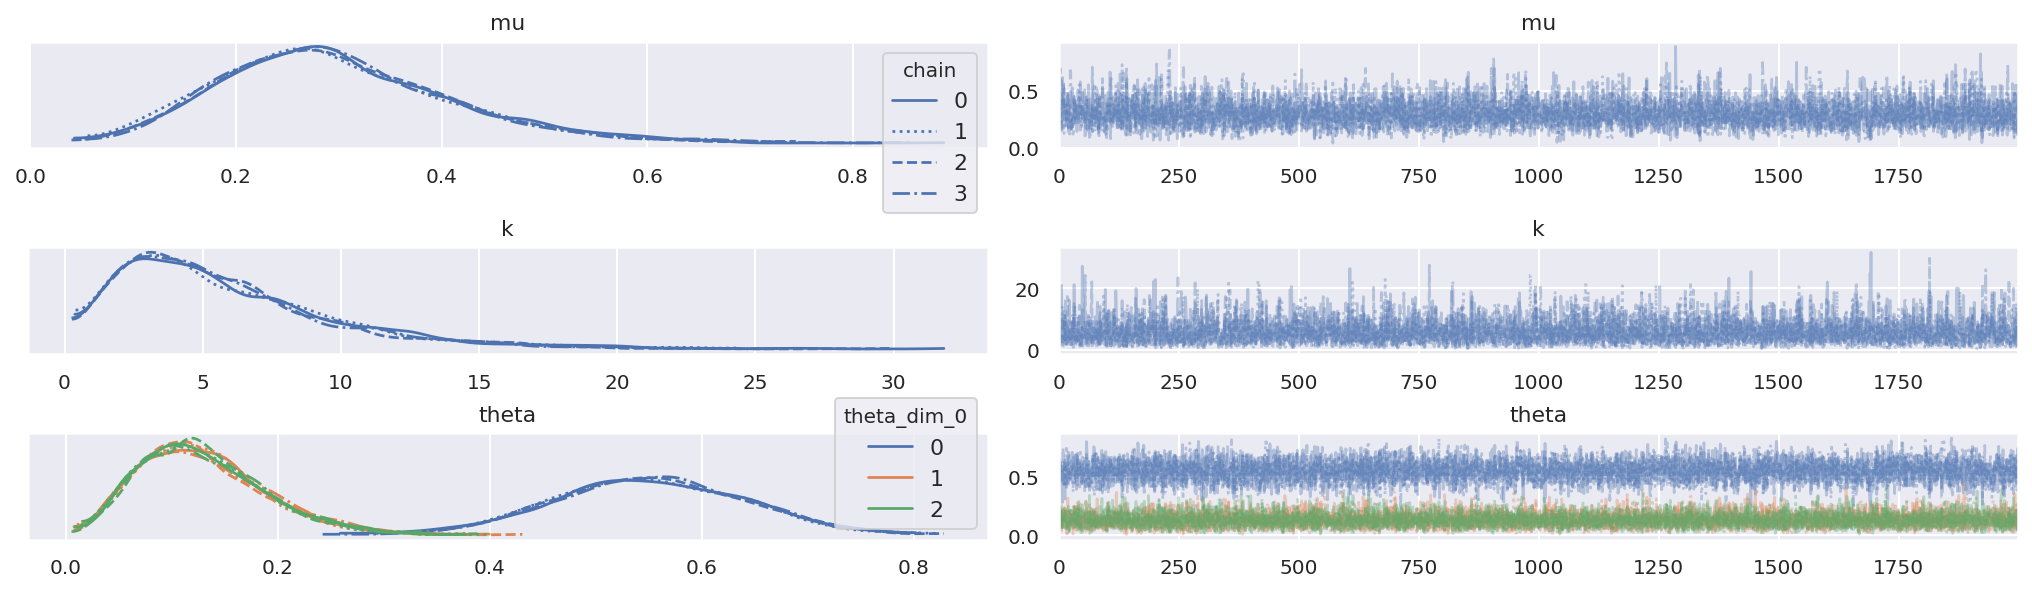

In [130]:
az.plot_trace(trace_h, figsize=(14, 4), legend=True)
plt.show()

In [131]:
az.summary(trace_h)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
mu        0.298  0.113   0.102    0.514      0.002    0.001    4753.0  4753.0   
k         5.826  3.945   0.341   12.997      0.056    0.040    4997.0  4977.0   
theta[0]  0.551  0.089   0.384    0.716      0.001    0.001    5332.0  5299.0   
theta[1]  0.129  0.060   0.025    0.237      0.001    0.001    6088.0  6088.0   
theta[2]  0.129  0.058   0.033    0.242      0.001    0.001    6212.0  6212.0   

          ess_bulk  ess_tail  r_hat  
mu          4676.0    4887.0    1.0  
k           4836.0    5325.0    1.0  
theta[0]    5323.0    5243.0    1.0  
theta[1]    5606.0    4244.0    1.0  
theta[2]    5738.0    4645.0    1.0

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<AxesSubplot:title={'center':'95.0% HDI'}>], dtype=object)

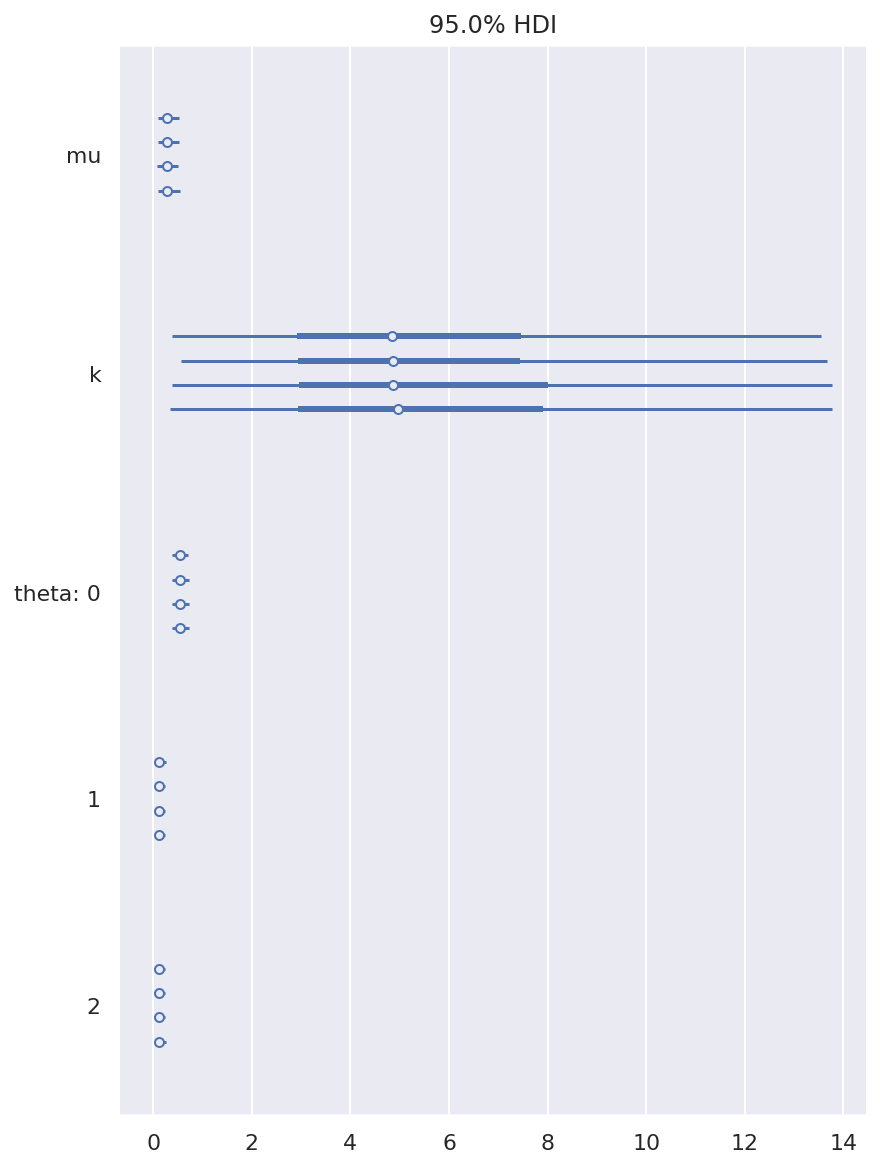

In [132]:
az.plot_forest(trace_h, hdi_prob=0.95)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'k'}>,
        <AxesSubplot:title={'center':'theta\n0'}>],
       [<AxesSubplot:title={'center':'theta\n1'}>,
        <AxesSubplot:title={'center':'theta\n2'}>, <AxesSubplot:>]],
      dtype=object)

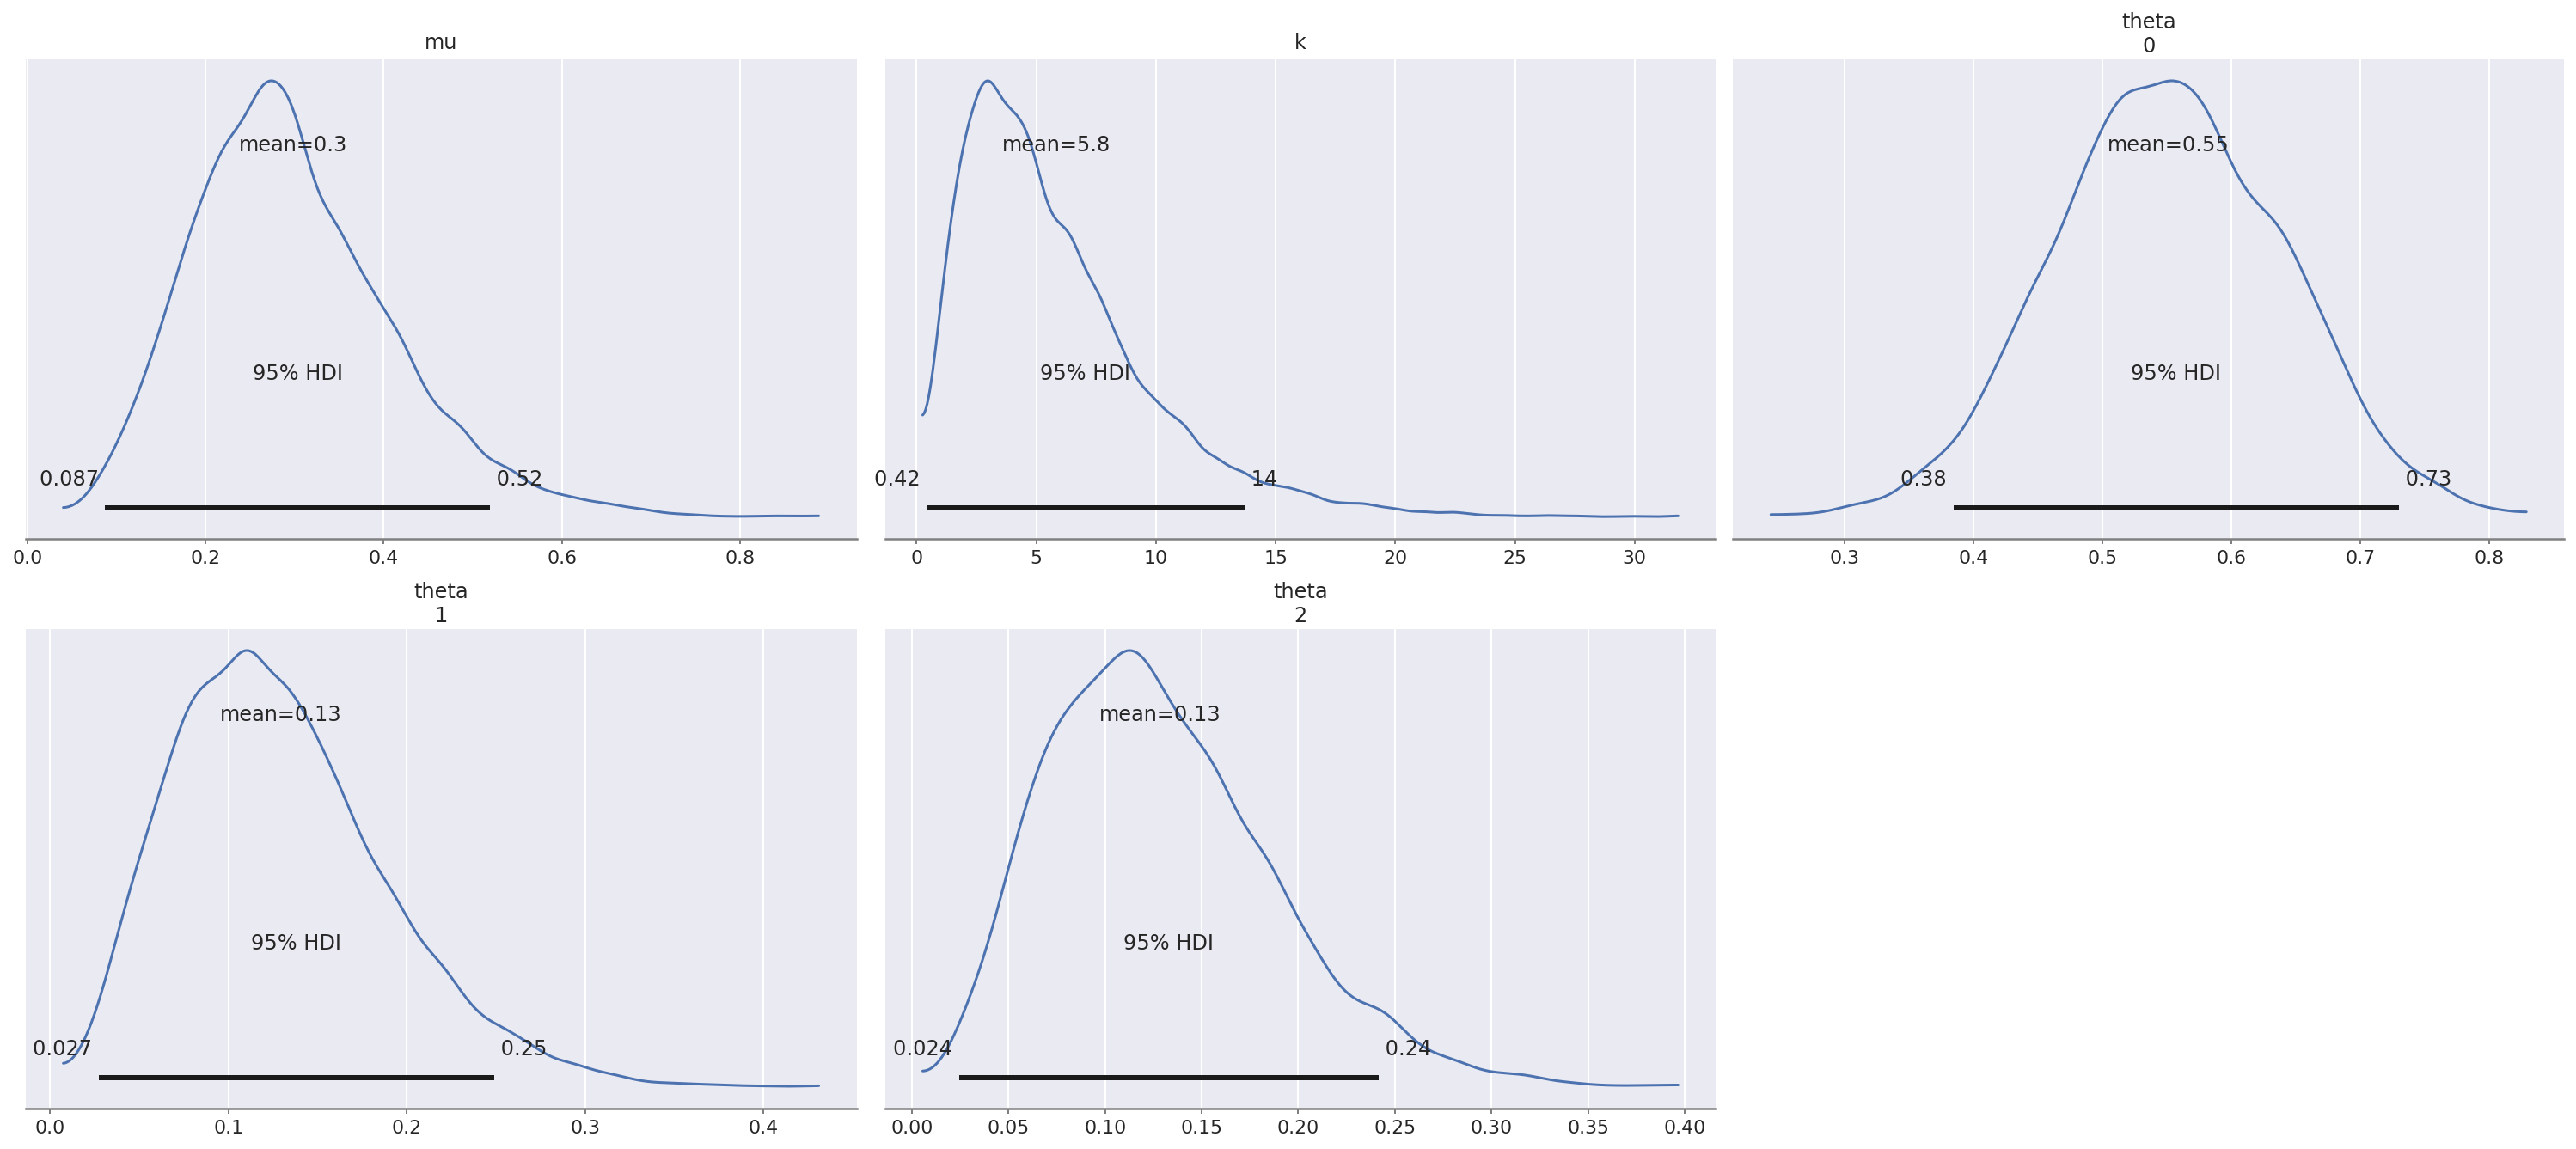

In [133]:
az.plot_posterior(trace_h, hdi_prob=0.95)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
posterior predictive variable y's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


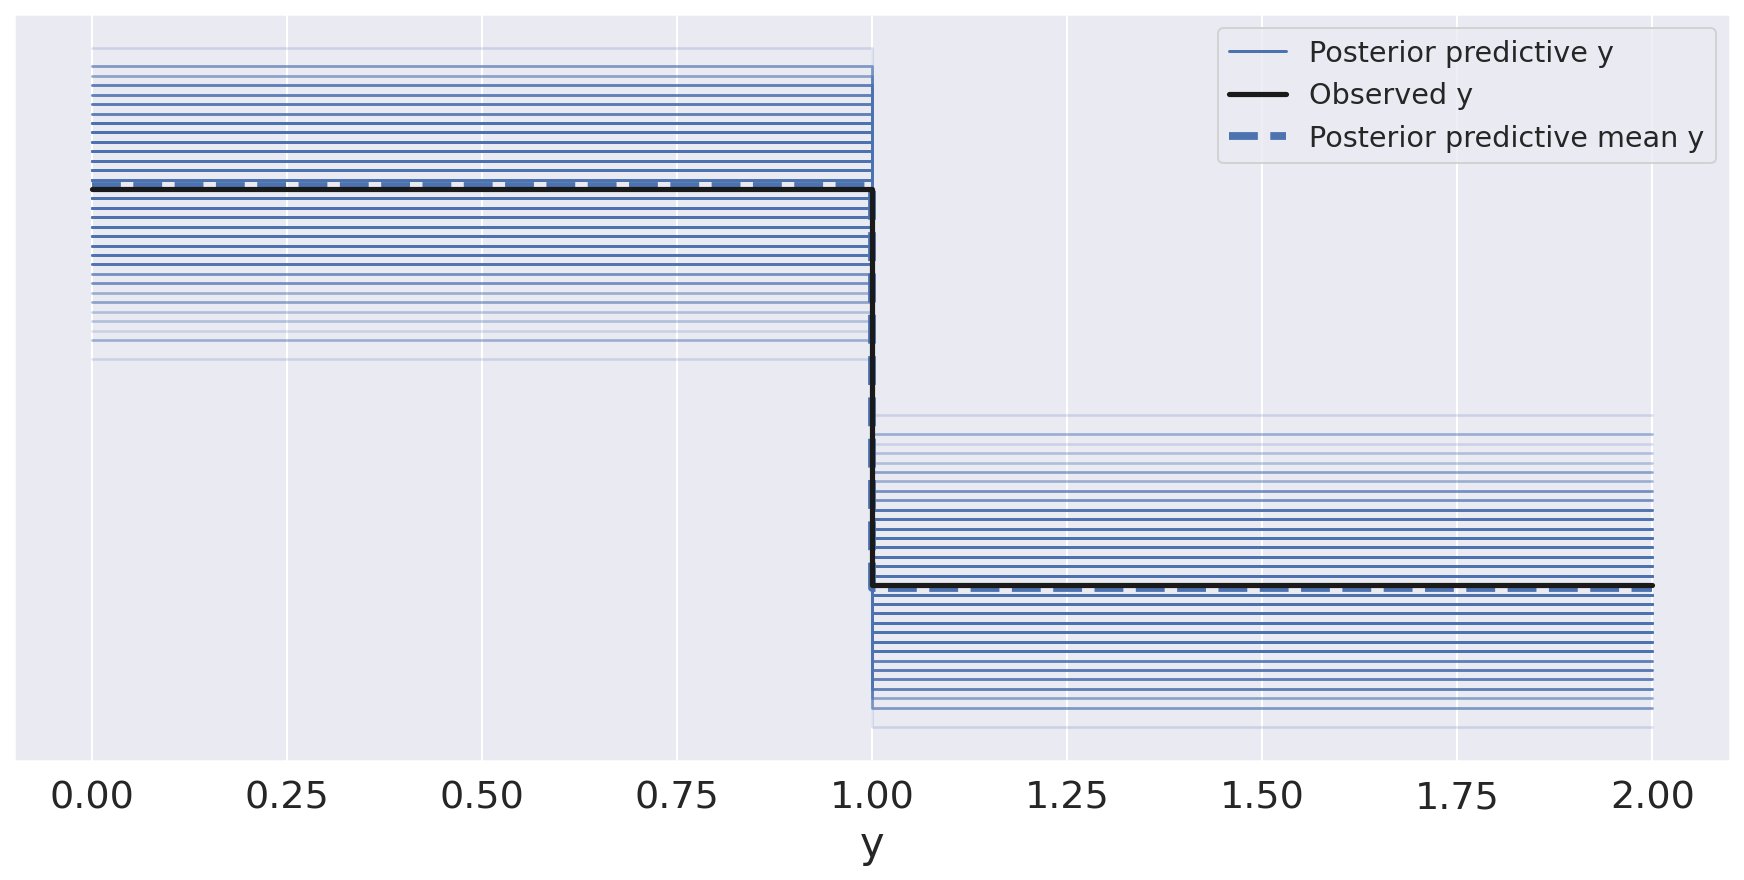

In [134]:
y_pred_t = az.from_pymc3(trace=trace_h, posterior_predictive=y_ppc)
ax = az.plot_ppc(y_pred_t, figsize=(12,6))

In [135]:
pd.concat([az.summary(trace_h), az.summary(trace_nh)])

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
mu        0.298  0.113   0.102    0.514      0.002    0.001    4753.0  4753.0   
k         5.826  3.945   0.341   12.997      0.056    0.040    4997.0  4977.0   
theta[0]  0.551  0.089   0.384    0.716      0.001    0.001    5332.0  5299.0   
theta[1]  0.129  0.060   0.025    0.237      0.001    0.001    6088.0  6088.0   
theta[2]  0.129  0.058   0.033    0.242      0.001    0.001    6212.0  6212.0   
mu        0.339  0.159   0.067    0.635      0.002    0.002    4717.0  4053.0   
k         9.084  5.941   0.129   19.294      0.097    0.081    3771.0  2679.0   
theta     0.271  0.047   0.185    0.361      0.001    0.001    3669.0  3669.0   

          ess_bulk  ess_tail  r_hat  
mu          4676.0    4887.0    1.0  
k           4836.0    5325.0    1.0  
theta[0]    5323.0    5243.0    1.0  
theta[1]    5606.0    4244.0    1.0  
theta[2]    5738.0    4645.0    1.0  
mu          4894.0    4463.0    1.0  
k           3563.0    3183.0    1.0  
theta       3631.0    3963.0    1.0

Иерархическая модель видится более детализированной с описанием эффекта по каждой группе включительно, плоская модель в сравнении с иерархической существенно усредняет картину происходящего. 

---

Task 8.

Создайте иерархическую версию примера оценки получения чаевых с частичным распределением по дням недели (`pooling across the
days of the week`). Сравните полученные результаты с результатами, вычисленными без применения иерархической структуры.

In [140]:
df_data = pd.read_csv('../data/tips.csv')
tip = df_data['tip'].values
idx = pd.Categorical(df_data['day'], categories=['Thur', 'Fri', 'Sat', 'Sun']).codes
groups = len(np.unique(idx))

In [141]:
with pm.Model() as model_tips:
    
    mu = pm.Normal('mu', mu=0, sd=10, shape=groups)
    sigma=pm.HalfNormal('sigma', sd=10, shape=groups)
    y = pm.Normal('y', mu=mu[idx], sd=sigma[idx], observed=tip)
    
    trace_tips = pm.sample(5000)
    ppc_tips = pm.sample_posterior_predictive(trace_tips, samples=1000)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 8 seconds.
/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:1691: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


In [142]:
with pm.Model() as model_tips_h:
    
    pooled_mu = pm.Normal('pooled_mu', mu=0, sd=10)
    mu = pm.Normal('mu', mu=pooled_mu, sd=10, shape=groups)
    sigma=pm.HalfNormal('sigma', sd=10, shape=groups)
    
    y = pm.Normal('y', mu=mu[idx], sd=sigma[idx], observed=tip)
    
    trace_tips_h = pm.sample(5000)
    ppc_tips_h = pm.sample_posterior_predictive(trace_tips_h, samples=1000)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu, pooled_mu]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 8 seconds.
/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:1691: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


In [143]:
az.summary(trace_tips)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  \
mu[0]     2.770  0.160   2.460    3.062      0.001    0.001   26132.0   
mu[1]     2.732  0.256   2.230    3.197      0.002    0.001   21724.0   
mu[2]     2.991  0.180   2.654    3.329      0.001    0.001   25391.0   
mu[3]     3.254  0.145   2.977    3.520      0.001    0.001   25961.0   
sigma[0]  1.266  0.116   1.056    1.483      0.001    0.001   20043.0   
sigma[1]  1.096  0.198   0.765    1.470      0.001    0.001   19004.0   
sigma[2]  1.656  0.129   1.426    1.907      0.001    0.001   23214.0   
sigma[3]  1.256  0.103   1.074    1.459      0.001    0.000   22386.0   

           ess_sd  ess_bulk  ess_tail  r_hat  
mu[0]     26125.0   26179.0   15755.0    1.0  
mu[1]     21724.0   22103.0   15241.0    1.0  
mu[2]     25365.0   25410.0   15997.0    1.0  
mu[3]     25951.0   25995.0   16106.0    1.0  
sigma[0]  19564.0   20686.0   16180.0    1.0  
sigma[1]  17369.0   21118.0   13780.0    1.0  
sigma[2]  22712.0   23753.0   16420.0    1.0  
sigma[3]  21866.0   23014.0   15938.0    1.0

In [144]:
az.summary(trace_tips_h)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  \
pooled_mu  2.319  4.430  -6.083   10.625      0.030    0.027   22057.0   
mu[0]      2.772  0.162   2.463    3.071      0.001    0.001   21335.0   
mu[1]      2.738  0.255   2.256    3.215      0.002    0.001   22027.0   
mu[2]      2.991  0.176   2.662    3.325      0.001    0.001   23020.0   
mu[3]      3.257  0.143   2.991    3.523      0.001    0.001   23499.0   
sigma[0]   1.266  0.119   1.057    1.495      0.001    0.001   22493.0   
sigma[1]   1.093  0.199   0.748    1.463      0.001    0.001   21150.0   
sigma[2]   1.655  0.128   1.417    1.892      0.001    0.001   24408.0   
sigma[3]   1.255  0.104   1.066    1.450      0.001    0.001   21859.0   

            ess_sd  ess_bulk  ess_tail  r_hat  
pooled_mu  13195.0   22058.0   15827.0    1.0  
mu[0]      21289.0   21411.0   14870.0    1.0  
mu[1]      21735.0   22330.0   13049.0    1.0  
mu[2]      22997.0   23032.0   15664.0    1.0  
mu[3]      23465.0   23518.0   15339.0    1.0  
sigma[0]   21607.0   23677.0   14505.0    1.0  
sigma[1]   19038.0   24149.0   14991.0    1.0  
sigma[2]   23619.0   25299.0   15507.0    1.0  
sigma[3]   21331.0   22381.0   15327.0    1.0

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

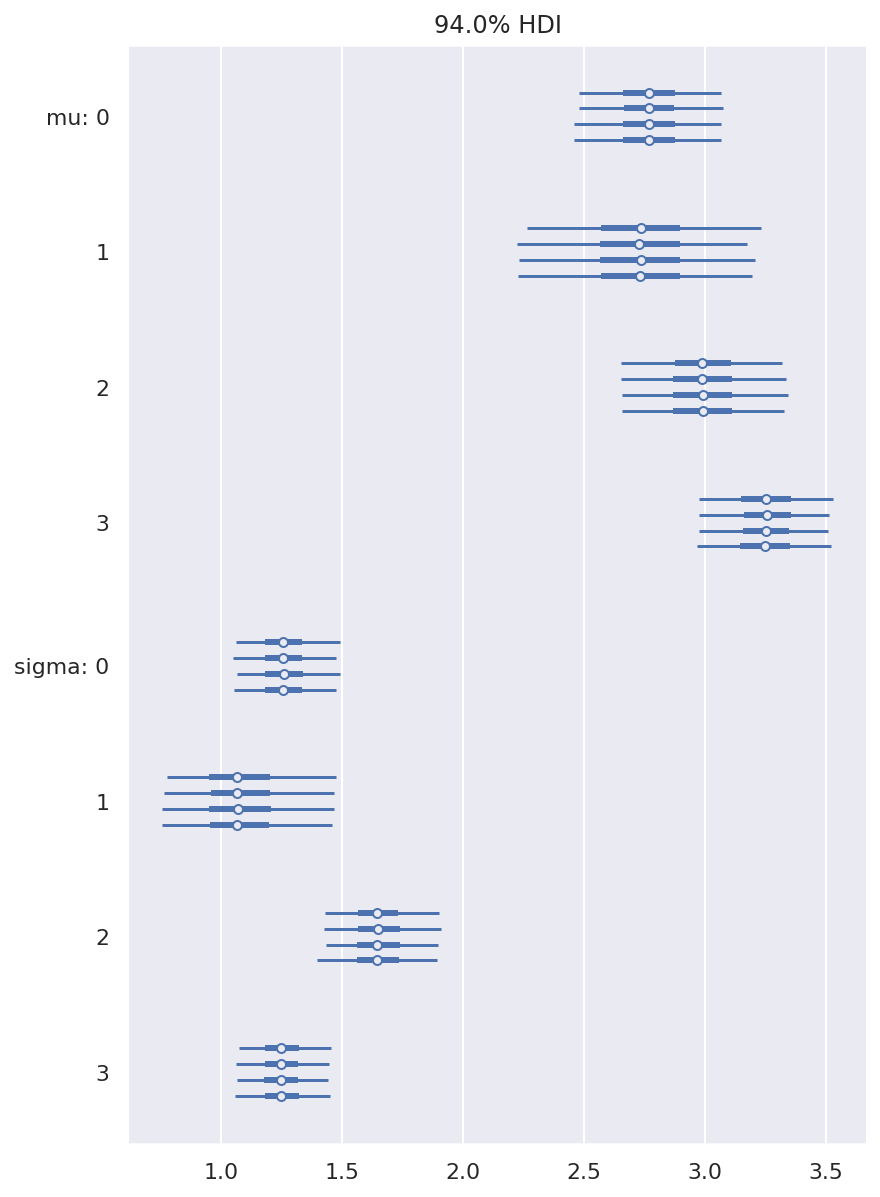

In [145]:
az.plot_forest(trace_tips)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

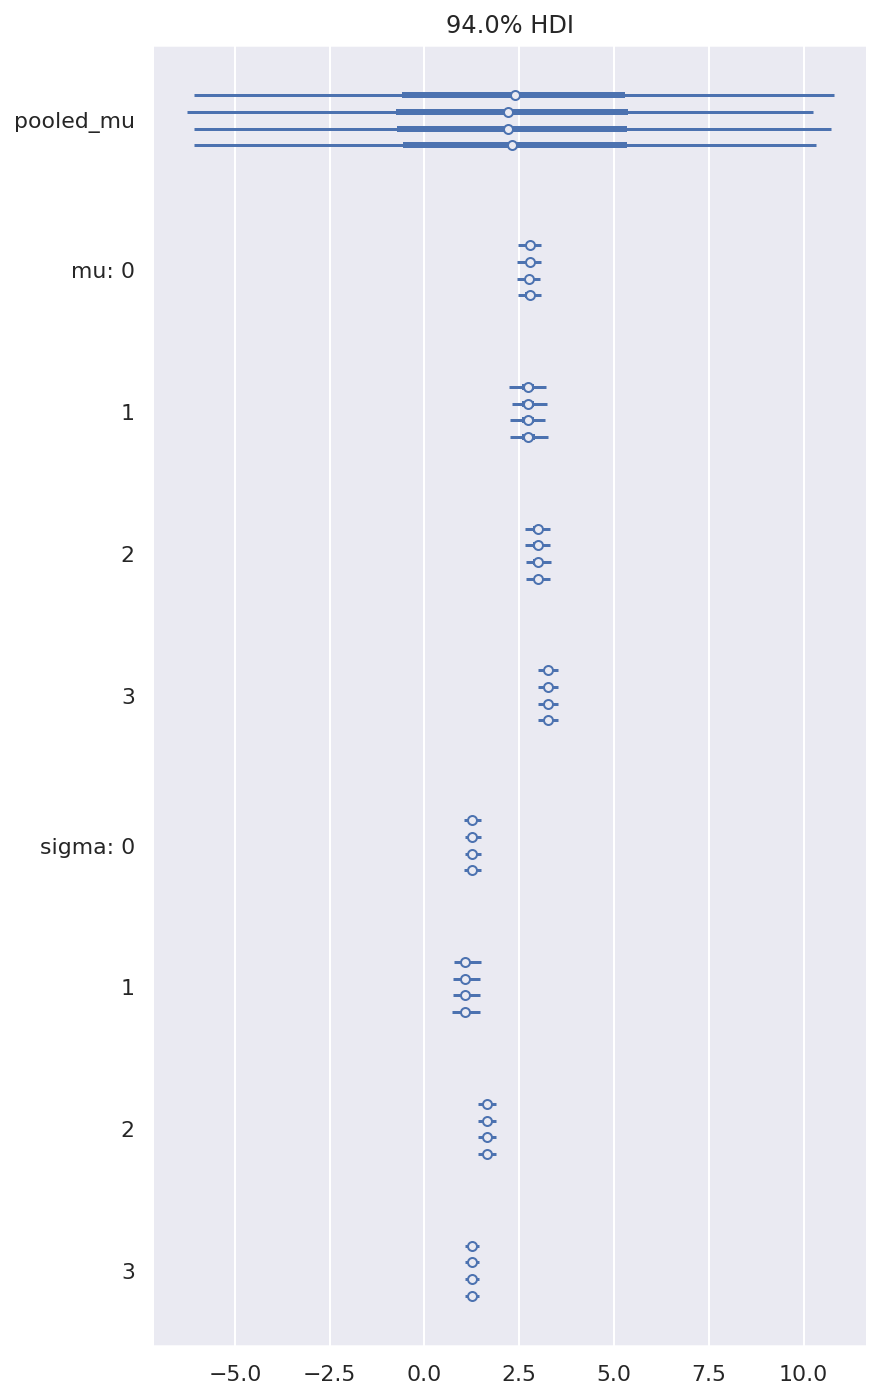

In [146]:
az.plot_forest(trace_tips_h)

Task 9.

Библиотека PyMC3 позволяет создавать из моделей направленные ациклические графы (directed acyclic graphs – DAC), очень похожие на диаграммы Крушке. Для получения таких графов можно воспользоваться функцией `pm.model_to_graphviz()`. Сгенерируйте направленные ациклические графы.

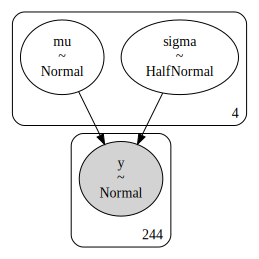

In [148]:
pm.model_to_graphviz(model_tips)

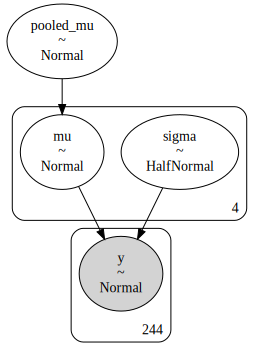

In [152]:
pm.model_to_graphviz(model_tips_h)